In [1]:
from sympy import *
import numpy as np
import math

Checking Some Derivatives

In [2]:
try:
  import gi
  gi.require_version('NumCosmo', '1.0')
  gi.require_version('NumCosmoMath', '1.0')
except:
  pass

import sys
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from gi.repository import NumCosmo as Nc
from gi.repository import NumCosmoMath as Ncm
%matplotlib inline

In [3]:
__name__ = "NcContext"

Ncm.cfg_init ()
Ncm.cfg_set_log_handler (lambda msg: sys.stdout.write (msg) and sys.stdout.flush ())

In [4]:
xb, z, Omega, w = symbols ('xb z Omega w', real=True, nonzero=True)


In [5]:
x = diff ((Omega * (1+z)**(3 * (1 + w)) * (1 -((1+z) / xb)**(3 * (1 - w)))), z,1)
print(x)



-Omega*((z + 1)/xb)**(3 - 3*w)*(3 - 3*w)*(z + 1)**(3*w + 3)/(z + 1) + Omega*(1 - ((z + 1)/xb)**(3 - 3*w))*(3*w + 3)*(z + 1)**(3*w + 3)/(z + 1)


In [6]:
xb = 1.0*10**25
w = 0.33
Omega = 1
l = -43
z = 2.0

In [7]:
N = 1 / (Omega * (xb * math.exp(-abs(l)))**(3 * (1 + w)) * (1 -(math.exp(-abs(l)))**(3 * (1 - w))))**(1/2)
dndtau = ((xb*math.exp(-abs(l)))**(-3*w - 3)*(0.5*Omega*(xb*math.exp(-abs(l)))**(3*w + 3)*(1 - math.exp(-(3 - 3*w)*abs(l)))*(3*w + 3)*l+ 0.5*Omega*(xb*math.exp(-abs(l)))**(3*w + 3)*(3*w - 3)*math.exp(-(3 - 3*w)*abs(l))*l))/(Omega*(Omega*(xb*math.exp(-abs(l)))**(3*w + 3)*(1 - math.exp(-(3 - 3*w)*abs(l))))**0.5*(1 - math.exp(-(3 - 3*w)*abs(l))))
num = (xb*math.exp(-abs(l)))**(-3*w - 3)*(0.5*Omega*(xb*math.exp(-abs(l)))**(3*w + 3)*(1 - math.exp(-(3 - 3*w)*abs(l)))*(3*w + 3)*l+ 0.5*Omega*(xb*math.exp(-abs(l)))**(3*w + 3)*(3*w - 3)*math.exp(-(3 - 3*w)*abs(l))*l)
dndtau2 = (2.25*(xb*math.exp(-abs(l)))**(-6*w - 6)*(xb*math.exp(-abs(l)))**(6*w + 6)*((w - 1)*math.exp(3*(w - 1)*abs(l)) - (w + 1)*(math.exp(3*(w - 1)*abs(l)) - 1))**2/(math.exp(3*(w - 1)*abs(l)) - 1) + 4.5*(xb*math.exp(-abs(l)))**(-3*w - 3)*(xb*math.exp(-abs(l)))**(3*w + 3)*(w - 1)*((w - 1)*math.exp(3*(w - 1)*abs(l)) - (w + 1)*(math.exp(3*(w - 1)*abs(l)) - 1))*math.exp(3*(w - 1)*abs(l))/(math.exp(3*(w - 1)*abs(l)) - 1) - 4.5*(xb*math.exp(-abs(l)))**(-3*w - 3)*(xb*math.exp(-abs(l)))**(3*w + 3)*(w + 1)*((w - 1)*math.exp(3*(w - 1)*abs(l)) - (w + 1)*(math.exp(3*(w - 1)*abs(l)) - 1)) - (xb*math.exp(-abs(l)))**(-3*w - 3)*(xb*math.exp(-abs(l)))**(3*w + 3)*(4.5*(w - 1)**2*math.exp(3*(w - 1)*abs(l)) - 9.0*(w - 1)*(w + 1)*math.exp(3*(w - 1)*abs(l)) + 4.5*(w + 1)**2*(math.exp(3*(w - 1)*abs(l)) - 1)))/((-Omega*(xb*math.exp(-abs(l)))**(3*w + 3)*(math.exp(3*(w - 1)*abs(l)) - 1))**0.5*(math.exp(3*(w - 1)*abs(l)) - 1))
x = xb * math.exp(- abs(l))
print(0.7 / (N * x**3), N)

3.0770466144546744e-07 2.404097794717623e-13


In [8]:
E2 = (Omega * (1+z)**(3 * (1 + w)) * (1 -((1+z) / xb)**(3 * (1 - w))))
d2E2dz2 = 3*Omega*(z + 1)**(3*w + 3)*(6*((z + 1)/xb)**(3 - 3*w)*(w - 1)*(w + 1) - ((z + 1)/xb)**(3 - 3*w)*(w - 1)*(3*w - 2) + (1 - ((z + 1)/xb)**(3 - 3*w))*(w + 1)*(3*w + 2))/(z + 1)**2
dE2dz = -Omega*((z + 1)/xb)**(3 - 3*w)*(3 - 3*w)*(z + 1)**(3*w + 3)/(z + 1) + Omega*(1 - ((z + 1)/xb)**(3 - 3*w))*(3*w + 3)*(z + 1)**(3*w + 3)/(z + 1)
print(E2, d2E2dz2, dE2dz)
cosmo1 = Nc.HICosmo.new_from_name(Nc.HICosmo, "NcHICosmoSFB")




80.11499433794584 106.19776599456976 106.552942469468


In [9]:
lnX_B = log (1.0e25);
x = z + 1.0;
lnx = log(x);
w = 0.33;
x_3_1pw = pow (x, 3.0 * (1.0 + w));
x_2_p3w = pow (x, 2.0 + 3.0 * w);
x_1_p3w = pow (x, 1.0 + 3.0 * w);
Omega_w = 1;
e_3t_1mw = (exp (-3.0 *(1.0 - w) * (lnx - lnX_B)) - 1.0);
E2 = Omega_w *x_3_1pw * e_3t_1mw;
E = sqrt(E2);
e_3t1w = exp (-3.0 *(1.0 - w) * (lnx - lnX_B));
dEdz = Omega_w * x_2_p3w * (3.0 * (1.0 + w) - 6.0 * w * e_3t1w);
dEdz2 = Omega_w * x_1_p3w * (3.0 * (1.0 + w) * (3.0 * w + 2.0) - 6.0 * w * (6.0 * w + 1.0) * e_3t1w);
result = 2.0 * dEdz * dEdz + 2.0 * E * dEdz2
print(dEdz, dEdz2, result)

-1.03334185323554e+51 -1.02645290754731e+51 2.13559077129653e+102


In [10]:
lp_RH= 1.0 / (Ncm.C.hubble_radius_hm1_planck () / 0.7)

In [11]:
cosmo = Nc.HICosmo.new_from_name(Nc.HICosmo, "NcHICosmoSFB")
csq1d = Nc.HIPertAdiab.new ()

ki    = 1.0e1
kf    = 1.0e9
k_a   = np.geomspace (ki, kf, 5)
csq1d.set_k (kf)
(Found2, etafa) = csq1d.find_adiab_time_limit (cosmo, t0=20.0, t1=100.0, reltol=1.0e1)

print (f"{Found2}, {etafa}")

csq1d.set_k (ki)
(Found1, etaia) = csq1d.find_adiab_time_limit (cosmo, t0=-100.0, t1=20.0, reltol=1.0e1)

print (f"{Found1}, {etaia}")


True, 37.01764822306717
True, -54.865466933188785


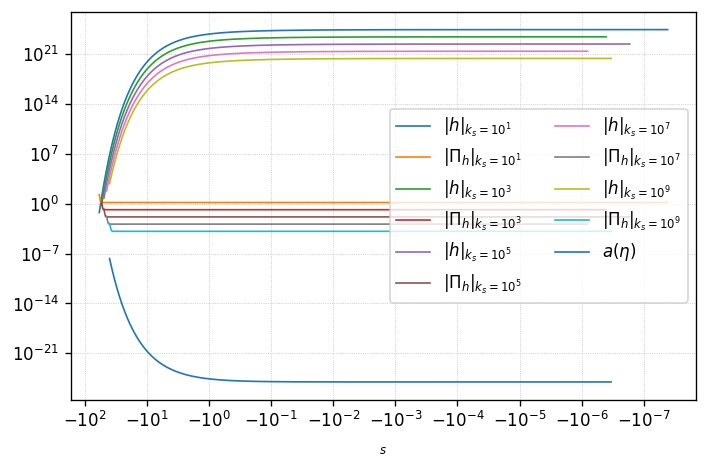

In [12]:
fig = plt.figure (dpi = 120)
max_etaf = 200.0
min_etai = -200.0

for k in k_a:
  csq1d.set_k (k)
  csq1d.set_reltol (1.0e-5)

  (Found1, etai)  = csq1d.find_adiab_time_limit (cosmo, -100.0, 20.0, 1.0e-5)
  (Found2, etafa) = csq1d.find_adiab_time_limit (cosmo, -100.0, 100.0, 1.0e-1)
  etaf = etafa * 10
  csq1d.set_ti (etai)
  csq1d.set_init_cond_adiab (cosmo, etai)
  csq1d.prepare(cosmo)
  min_etai = min (etai, min_etai)
  max_etaf = max (etaf, max_etaf)
#Check if the derivatives are right with sympy and then check why is init_cond_adiab crashing for some momentum. Find a   
  eta_a, eta_s = csq1d.get_time_array ()
     
  y_a          = []
  Abs_phi2_a   = []
  Abs_Pphi2_a  = []
  myt = []

  eta_a = np.array (eta_a)
  for eta in eta_a:
    (J11, J12, J22) = csq1d.get_J_at (cosmo, eta)
    if eta <= 0.0:
      Abs_phi2_a.append (J11)
      Abs_Pphi2_a.append (J22)
      myt.append(eta)
    else:
      pass
  y_a         = np.array (y_a)
  Abs_phi2_a  = np.array (Abs_phi2_a)
  Abs_Pphi2_a = np.array (Abs_Pphi2_a)

  mylw    = 1

  plt.plot (myt, np.sqrt (Abs_phi2_a), lw=mylw, label = r'$\vert h\vert_{k_s = 10^{%0.2g}}$' % math.log10 (k))
  plt.plot (myt, np.sqrt (Abs_Pphi2_a), lw=mylw, label = r'$\vert\Pi_h\vert_{k_s = 10^{%0.2g}}$' % math.log10 (k))

etac_a = np.geomspace (min_etai, -eta_s, 1000)
etae_a = np.geomspace (eta_s, max_etaf, 1000)
eta_a  = np.concatenate ((etac_a, etae_a))
a_a    = np.array ([10**(-25)*math.exp(abs(eta)) for eta in myt])
a_b    = min (a_a)

plt.plot (myt, a_a, lw=mylw, label = r'$a(\eta)$')

plt.grid (b=True, which='both', linestyle=':', color='0.75', linewidth=0.5)
leg = plt.legend (loc="best", ncol = 2)
plt.xscale('symlog', linthresh = 1.0e-30, linscale = 4.0)
plt.yscale('log')
plt.xlabel ("$\t_s$")
fig.tight_layout ()



plt.show ()



In [15]:
def sigma_k2(cosmo, eta, k, zk2, pizk2, w):
    lp_RH   = 1.0 / (Ncm.C.hubble_radius_hm1_planck () / 0.7)
    zk = np.sqrt(zk2)
    pizk = np.sqrt(pizk2)
    H = cosmo.eval_H(eta, k)
    x = cosmo.eval_x (eta, k)
    Omega = x**(3 * w)
    t1 = zk2
    t21 = 2.0 * zk * pizk
    t22 = H * x / (2.0 * k) - 1 / (9 * Omega * (1 + w)) 
    t31 = pizk2
    t32 = t22 * t22
    mult = 9 * (1 + w)**2 * lp_RH**2 * k**3
    return mult * (t1 + t21 * t22 + t31 * t32)

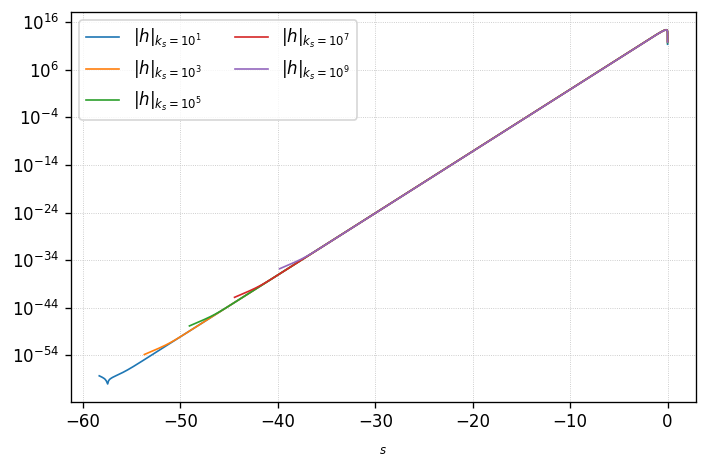

In [18]:
fig = plt.figure (dpi = 120)
max_etaf = 200.0
min_etai = -200.0

for k in k_a:
  csq1d.set_k (k)
  csq1d.set_reltol (1.0e-5)

  (Found1, etai)  = csq1d.find_adiab_time_limit (cosmo, -100.0, 20.0, 1.0e-5)
  (Found2, etafa) = csq1d.find_adiab_time_limit (cosmo, -100.0, 100.0, 1.0e-1)
  etaf = etafa * 10
  csq1d.set_ti (etai)
  csq1d.set_init_cond_adiab (cosmo, etai)
  csq1d.prepare(cosmo)
  min_etai = min (etai, min_etai)
  max_etaf = max (etaf, max_etaf)
#Check if the derivatives are right with sympy and then check why is init_cond_adiab crashing for some momentum. Find a   
  eta_a, eta_s = csq1d.get_time_array ()
     
  y_a          = []
  Abs_phi2_a   = []
  Abs_Pphi2_a  = []
  myt = []

  eta_a = np.array (eta_a)
  for eta in eta_a:
    (J11, J12, J22) = csq1d.get_J_at (cosmo, eta)
    teste = sigma_k2(cosmo, eta, k, J11, J22, 0.33)
    if eta <= 0.0:
      Abs_phi2_a.append ((teste))

      myt.append(eta)
    else:
      pass
  y_a         = np.array (y_a)
  Abs_phi2_a  = np.array (Abs_phi2_a)


  mylw    = 1

  plt.plot (myt, np.sqrt (Abs_phi2_a), lw=mylw, label = r'$\vert \\sigma_{\\}\vert_{k_s = 10^{%0.2g}}$' % math.log10 (k))



a_a    = np.array ([10**(-25)*math.exp(abs(eta)) for eta in myt])
a_b    = min (a_a)

#plt.plot (myt, a_a, lw=mylw, label = r'$a(\eta)$')

plt.grid (b=True, which='both', linestyle=':', color='0.75', linewidth=0.5)
leg = plt.legend (loc="best", ncol = 2)
plt.yscale('log')
plt.xlabel ("$\t_s$")
fig.tight_layout ()



plt.show ()



1.2376329834663807e-18


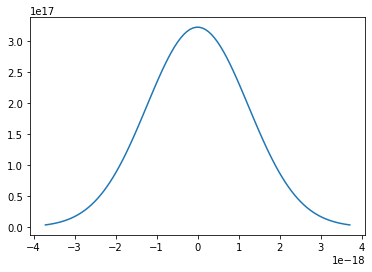

1.2418833431766226e-18


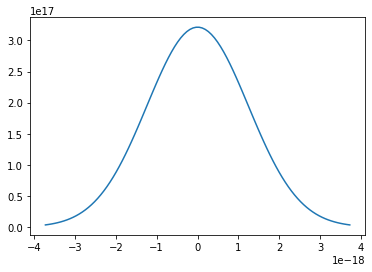

1.2461483907580988e-18


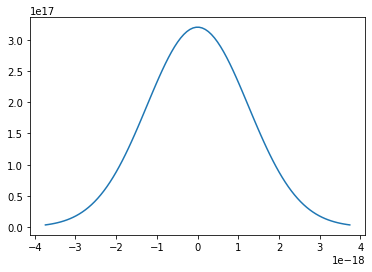

1.2504281801341778e-18


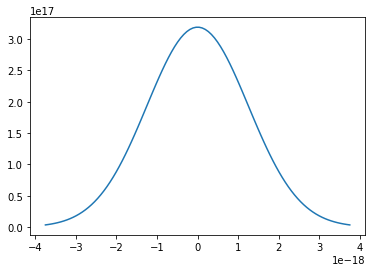

1.2580175046536585e-18


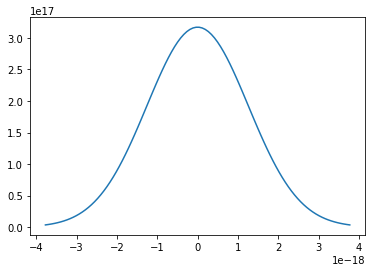

1.2696025330329772e-18


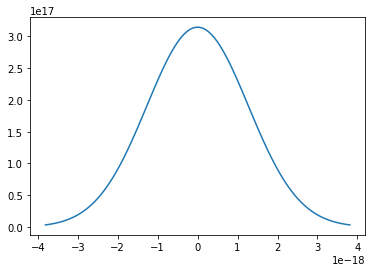

1.2812949716905029e-18


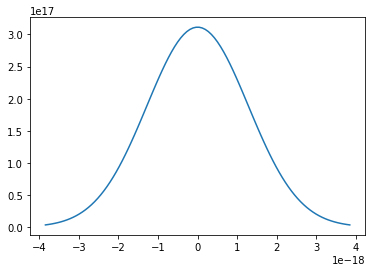

1.3189632115712235e-18


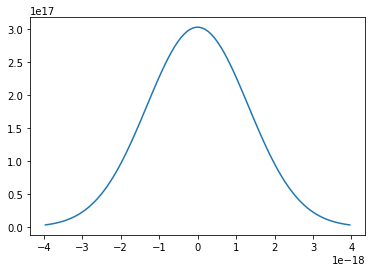

1.3433012378223093e-18


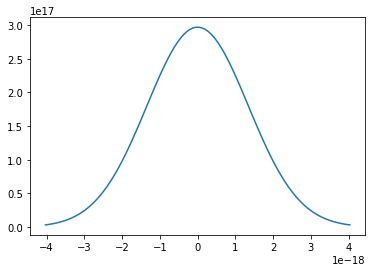

1.3680917945304819e-18


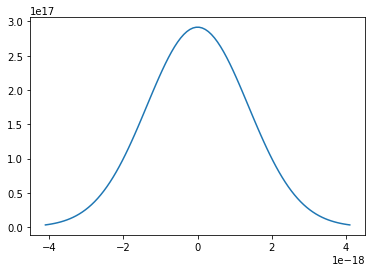

1.3933435021536431e-18


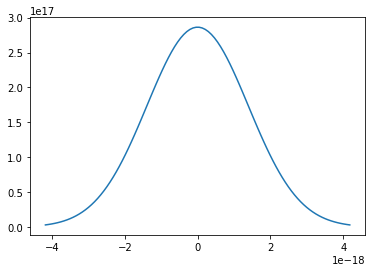

1.4428205816118716e-18


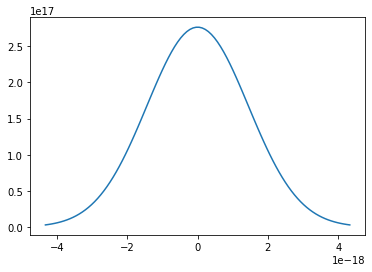

1.4940703623193275e-18


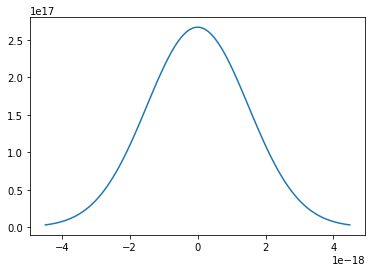

1.5471580260316093e-18


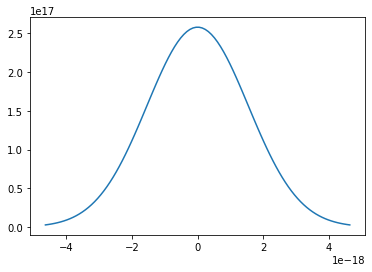

1.5511565013255124e-18


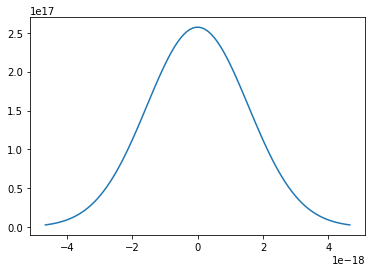

1.5604515262157388e-18


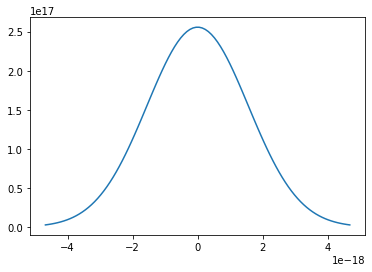

1.5698027379395029e-18


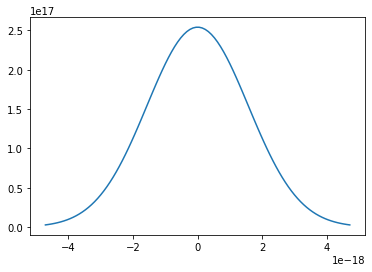

1.579210532713878e-18


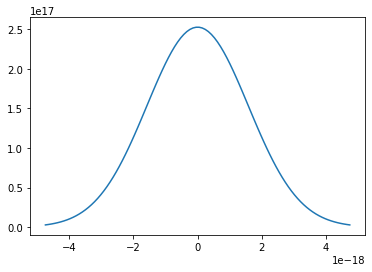

1.5941827668547664e-18


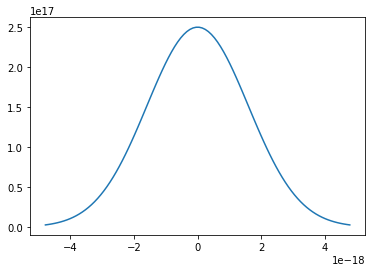

1.6179748758297574e-18


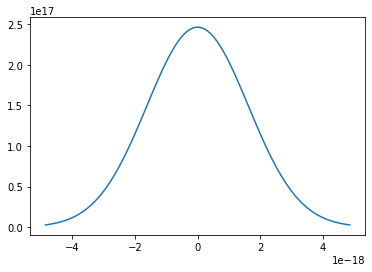

1.6421259347677838e-18


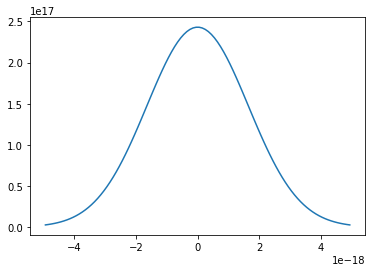

1.6666415387342653e-18


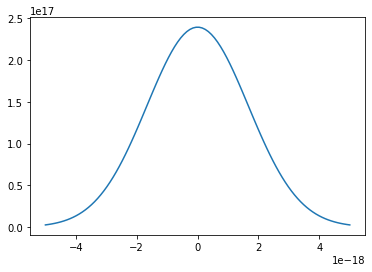

1.750405285667114e-18


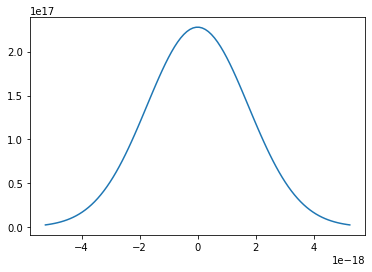

1.838434116644997e-18


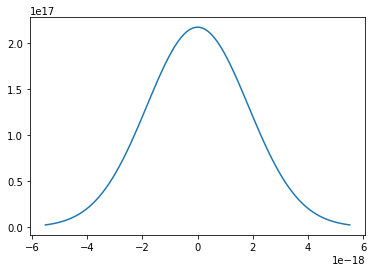

1.9309534635079216e-18


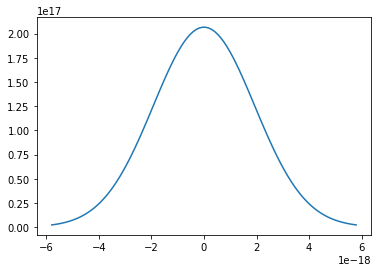

2.0282028990764644e-18


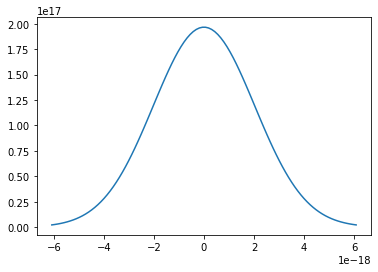

2.13043610240238e-18


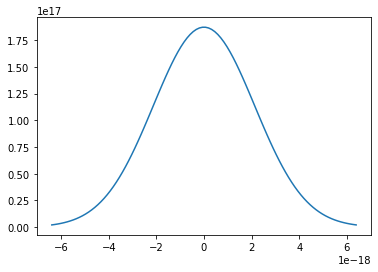

2.2379215967326643e-18


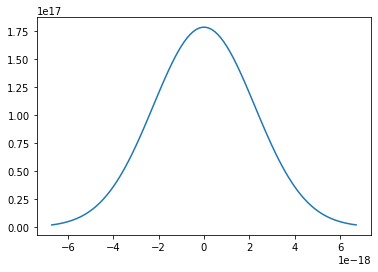

2.5523966602383137e-18


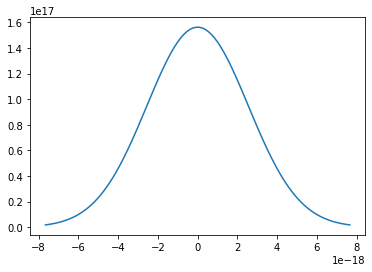

2.9123393580915008e-18


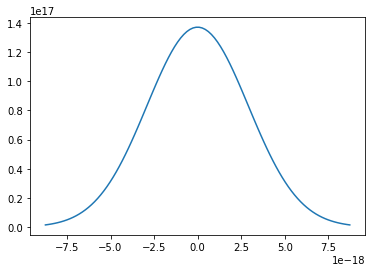

3.3248721148880287e-18


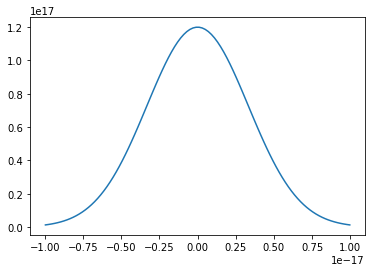

3.798508112521961e-18


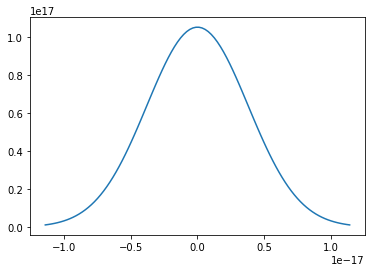

4.343554266467989e-18


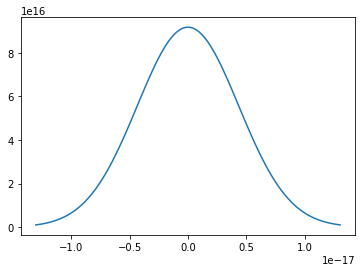

4.9725234867165434e-18


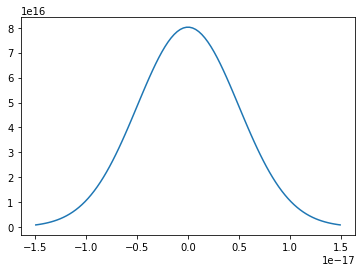

5.043291891739128e-18


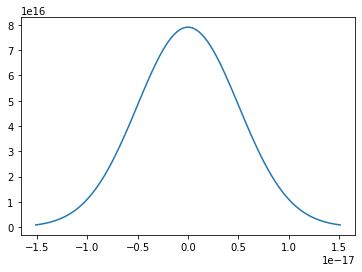

5.115150592011135e-18


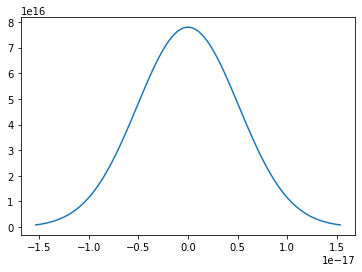

5.18811666953365e-18


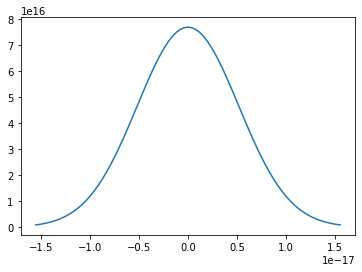

5.312214478134823e-18


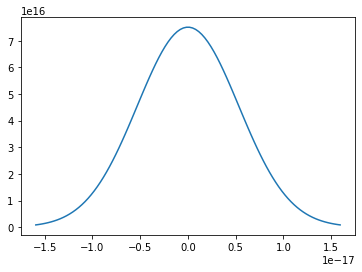

5.439534911873779e-18


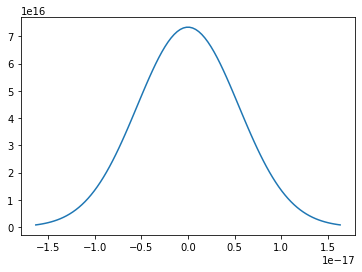

5.570175939359905e-18


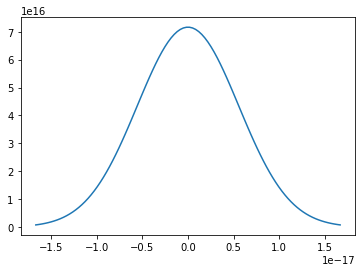

5.704239682191945e-18


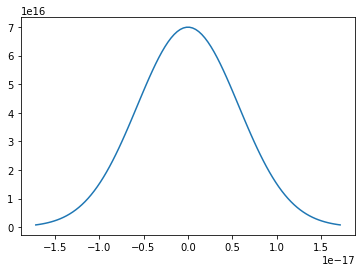

5.940635888599029e-18


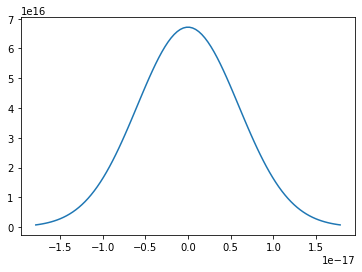

6.4294611698292275e-18


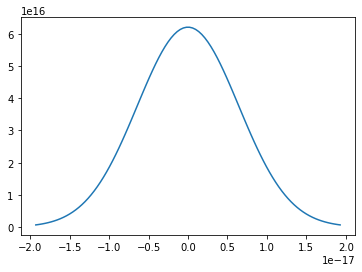

6.963114008591401e-18


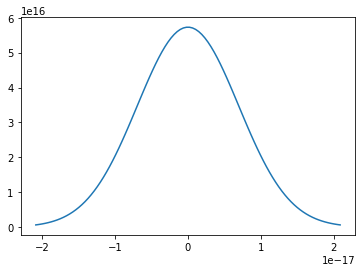

7.54658751767931e-18


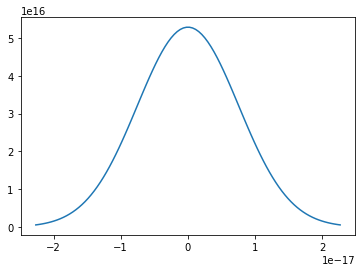

8.18556130514412e-18


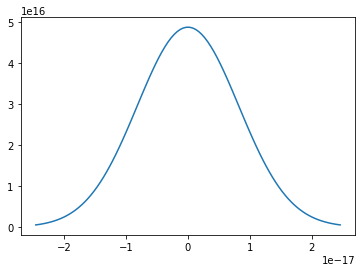

8.886503993771365e-18


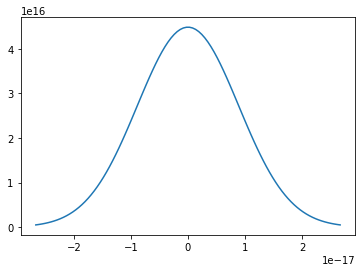

9.88512219196116e-18


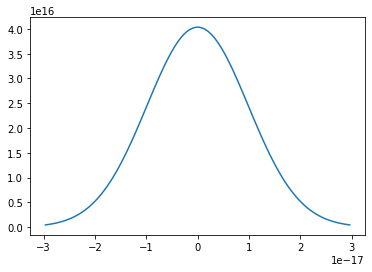

1.1015103120545859e-17


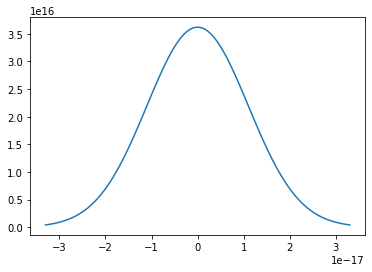

1.2297492706297115e-17


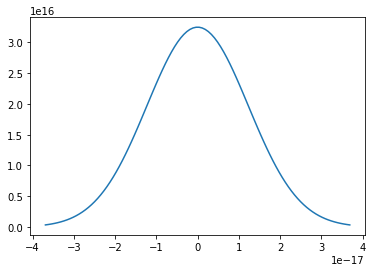

1.3757026106977053e-17


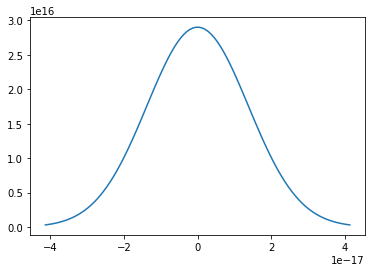

1.6473808228920592e-17


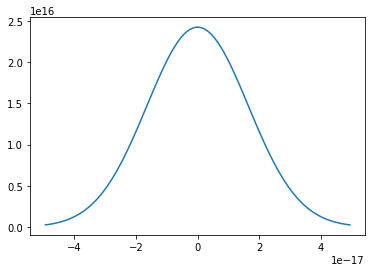

1.9835516168559783e-17


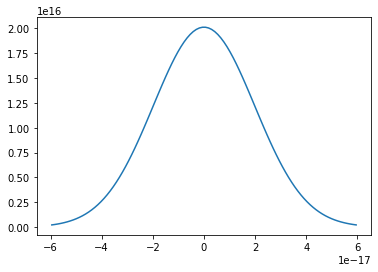

2.2435729041188383e-17


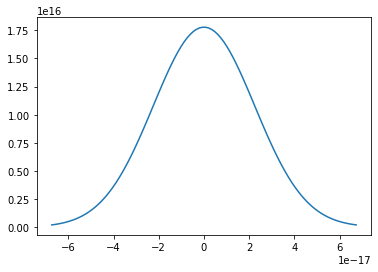

2.5434360481568304e-17


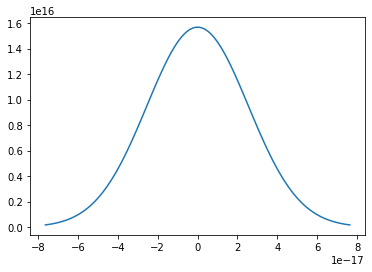

2.889653702273636e-17


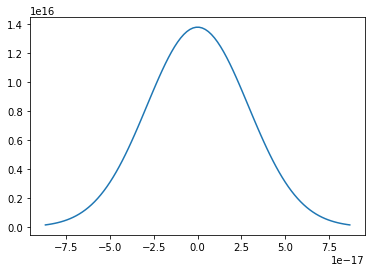

3.289743476754435e-17


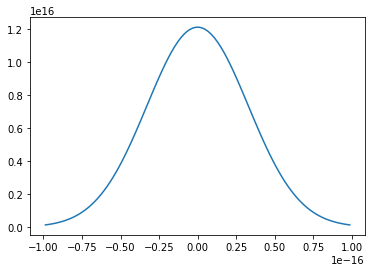

3.7523787984707824e-17


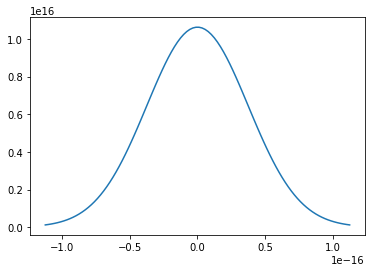

4.287556113557229e-17


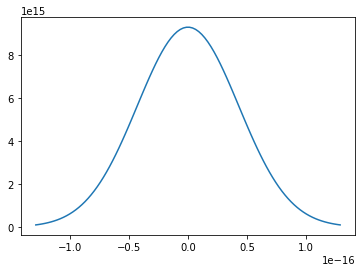

4.906793200901375e-17


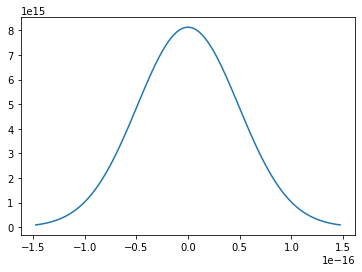

6.244719962877129e-17


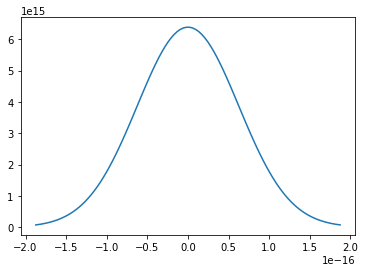

7.975222363031e-17


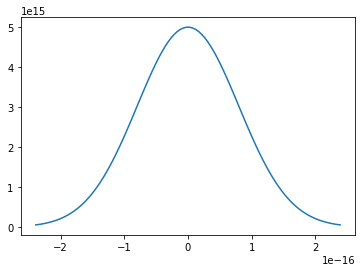

1.0212557479196983e-16


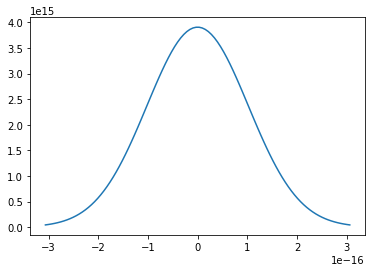

1.3103912156487353e-16


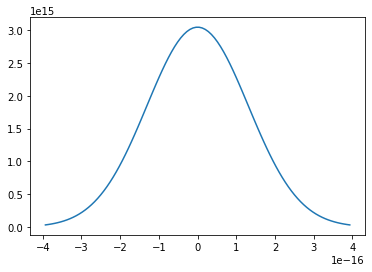

1.6839126686306935e-16


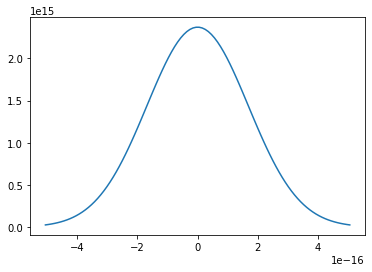

2.1663301867424596e-16


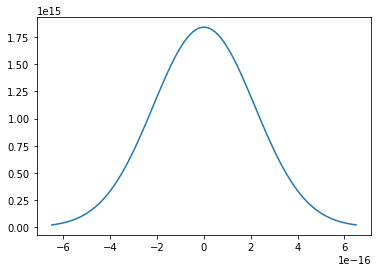

2.7892873507388374e-16


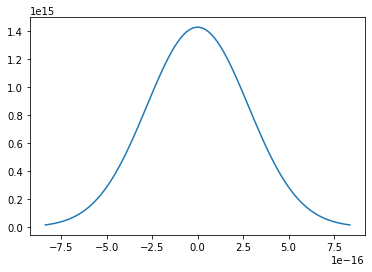

3.5935794951881773e-16


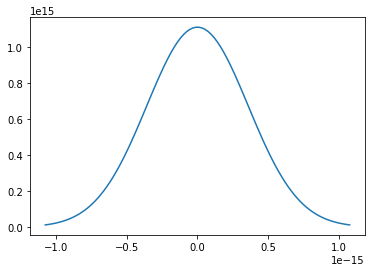

4.6317771522727e-16


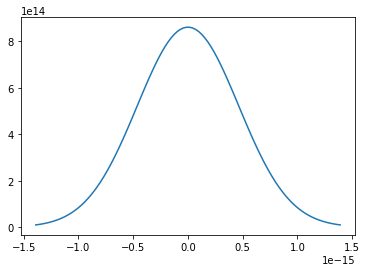

5.971574979148621e-16


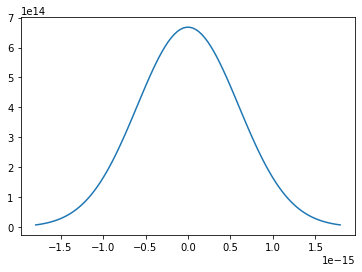

7.700590750243137e-16


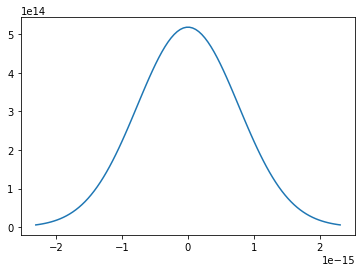

9.930828752294755e-16


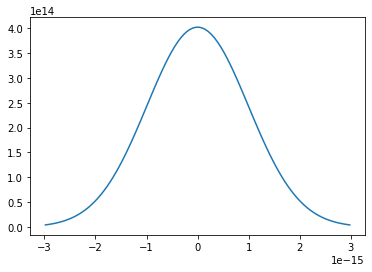

1.2808388591681564e-15


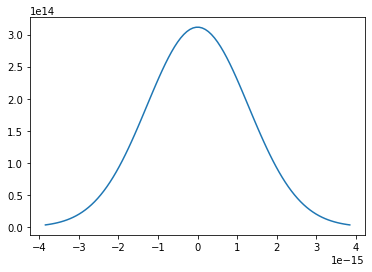

1.5372410121481971e-15


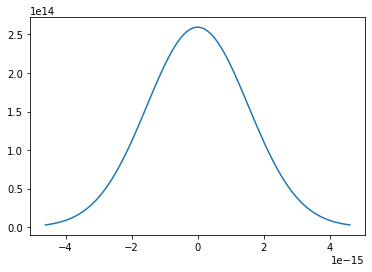

1.8450926838279255e-15


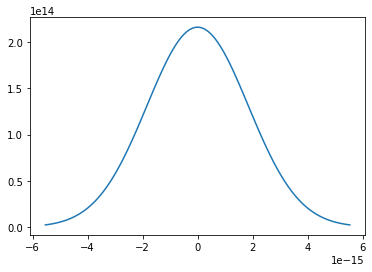

2.214615588033778e-15


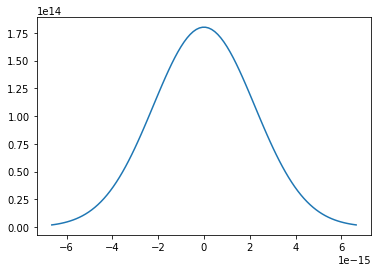

2.65814351846808e-15


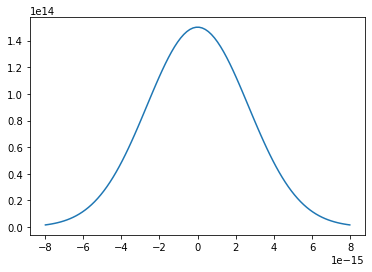

3.190551423646406e-15


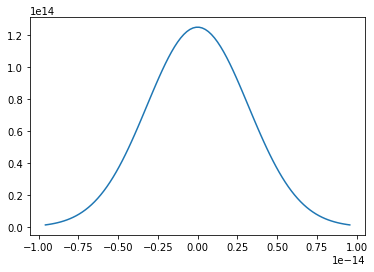

3.8296858564208545e-15


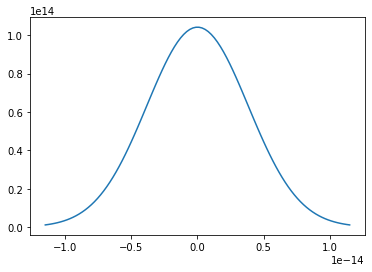

4.596915583796402e-15


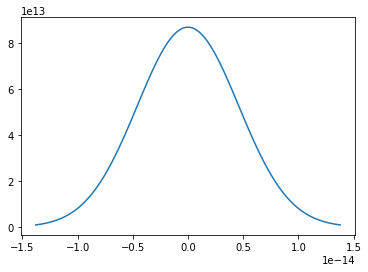

5.5178710519137e-15


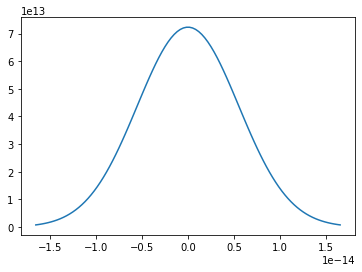

6.623347420130266e-15


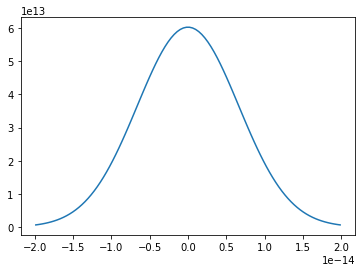

7.95033966724445e-15


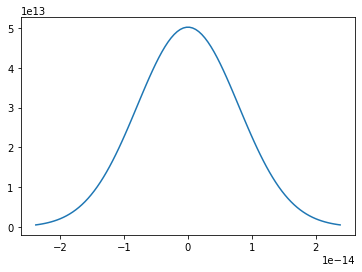

9.543249384904228e-15


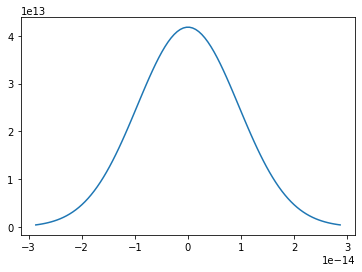

1.1455350776572292e-14


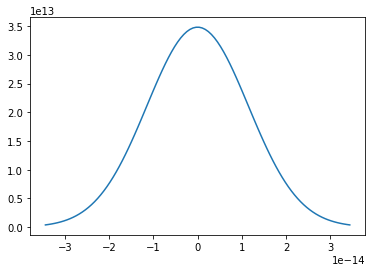

1.3750585035950326e-14


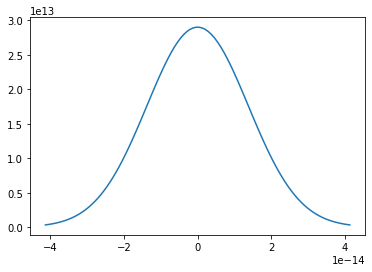

1.8259261635869467e-14


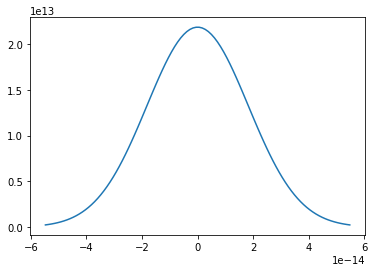

2.4246323001272723e-14


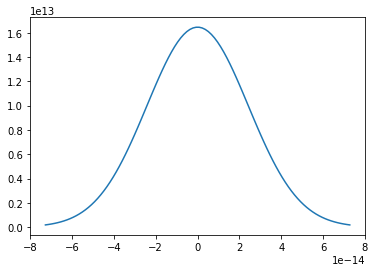

3.2196595064965705e-14


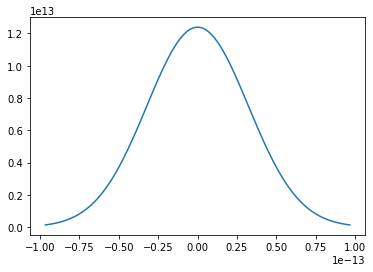

4.27538737586656e-14


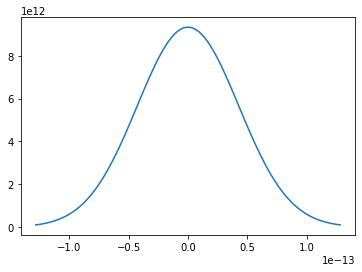

5.6772984842934436e-14


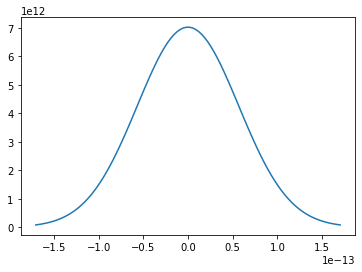

7.538901721623383e-14


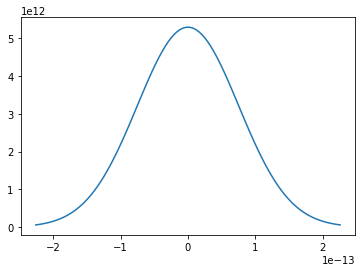

1.0010930260883391e-13


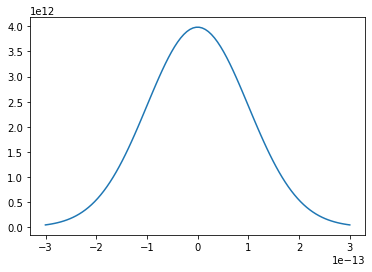

1.3293549022666393e-13


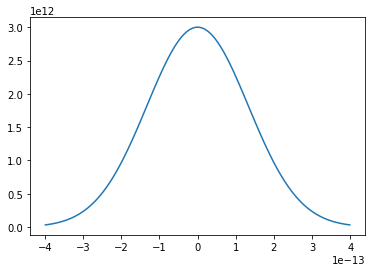

1.7652557260844046e-13


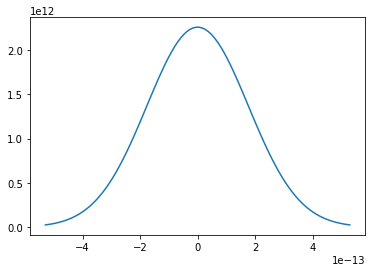

2.344090572781064e-13


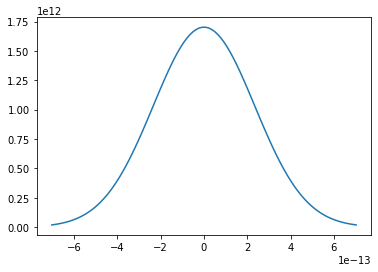

3.1127277042287053e-13


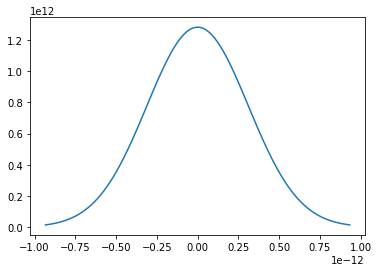

4.1334039891940375e-13


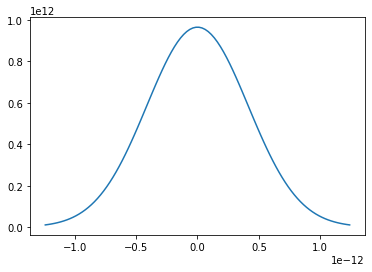

5.488764271341068e-13


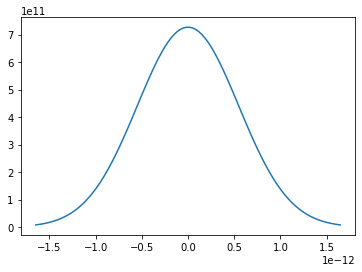

7.288552684245198e-13


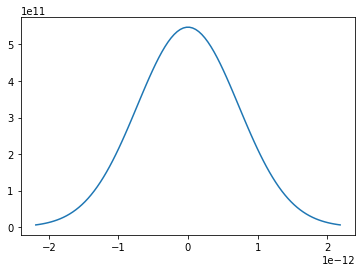

9.678498367058647e-13


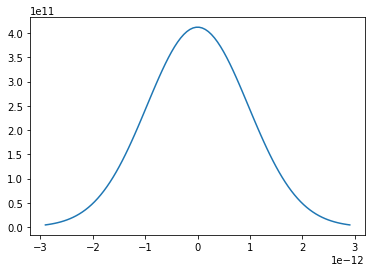

1.2852115337808599e-12


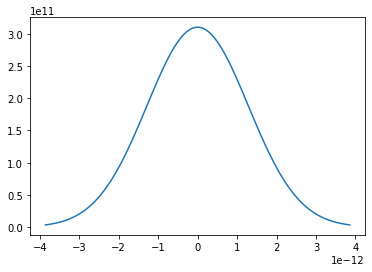

1.7066371378575145e-12


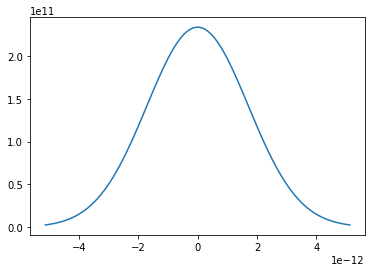

2.2662494053371394e-12


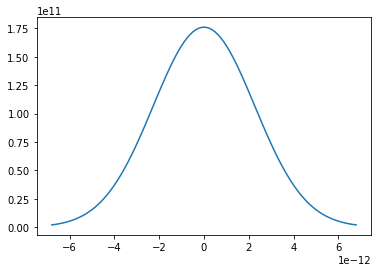

3.0093598783330758e-12


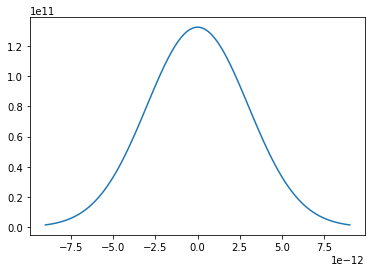

3.996137653607803e-12


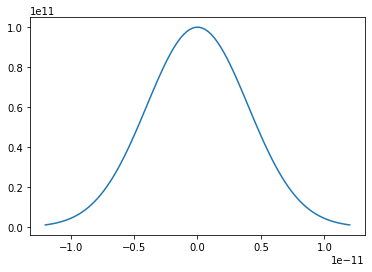

5.306485538721197e-12


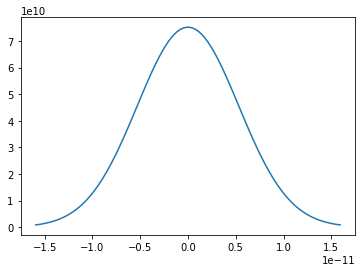

7.046499377984412e-12


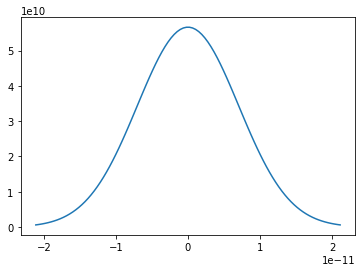

9.357061671316195e-12


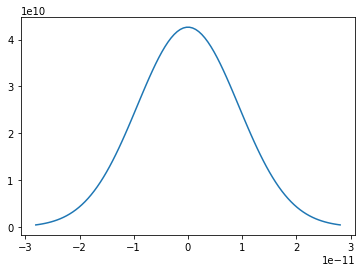

1.2425244426503943e-11


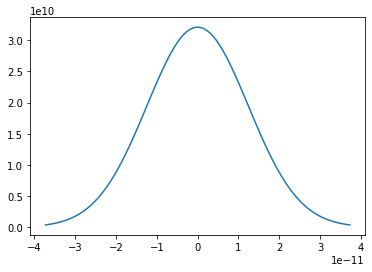

1.649947738832358e-11


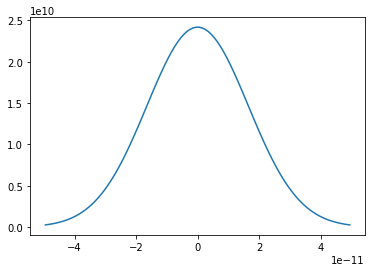

2.190963498461517e-11


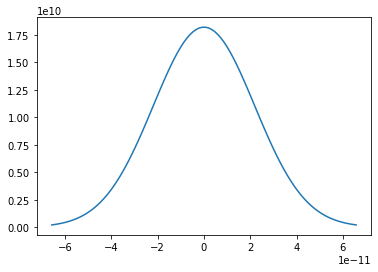

2.9093768239896892e-11


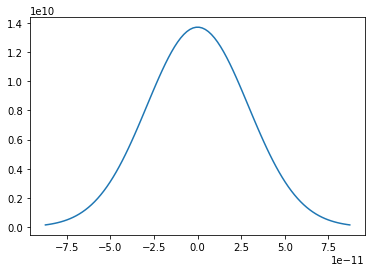

3.8633482698093385e-11


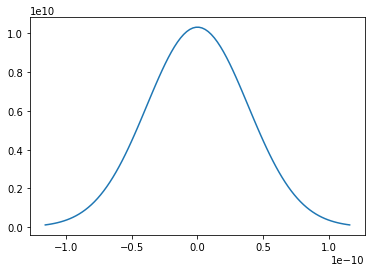

5.130120697410572e-11


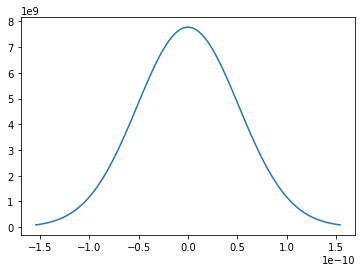

6.812235626660637e-11


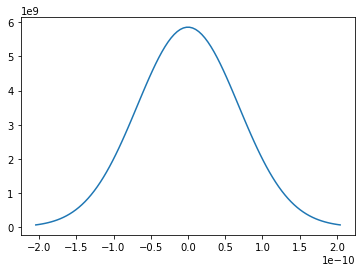

9.045926982455556e-11


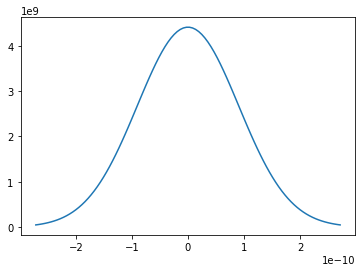

1.2012163366554696e-10


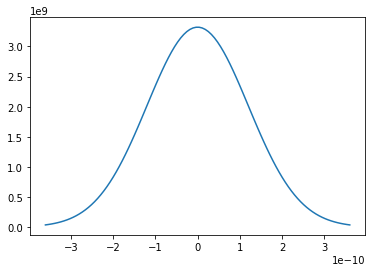

1.5950991977261568e-10


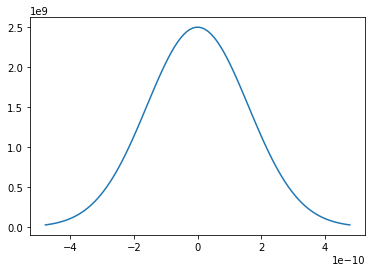

2.1181521174436128e-10


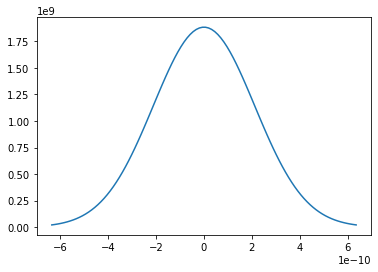

2.81273237540127e-10


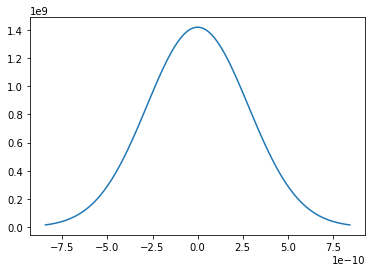

3.735060715086824e-10


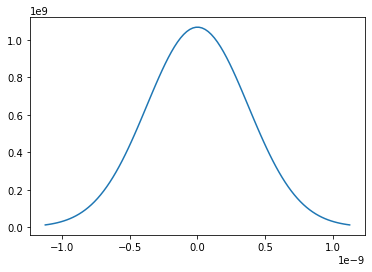

4.959800738567066e-10


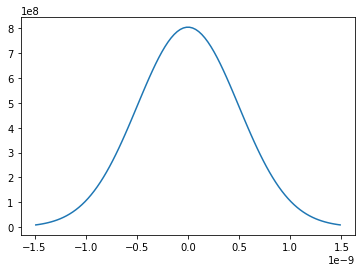

6.586128147575548e-10


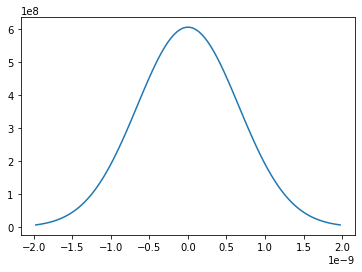

8.745748786335507e-10


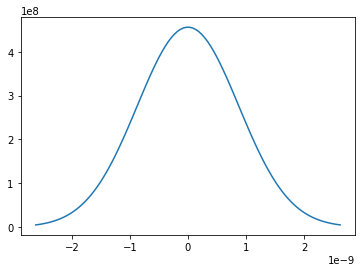

1.1613534508400594e-09


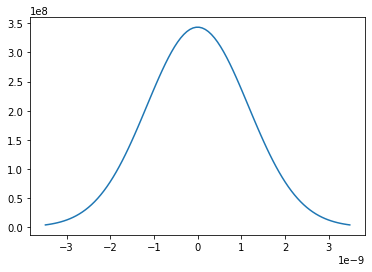

1.5421677493845524e-09


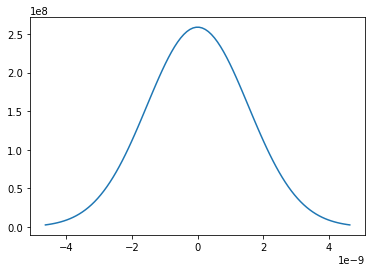

2.0478513331609107e-09


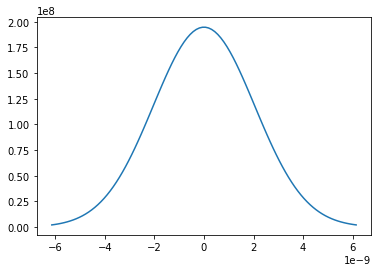

2.719350429498033e-09


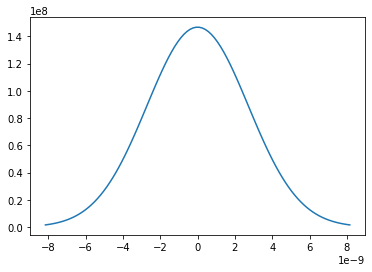

3.6110383686570884e-09


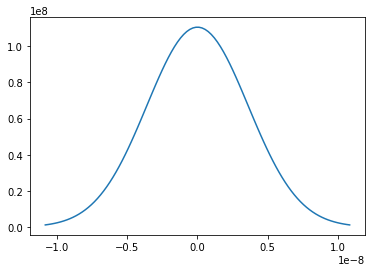

4.7951161618519024e-09


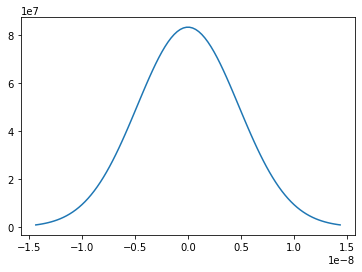

6.36745842129725e-09


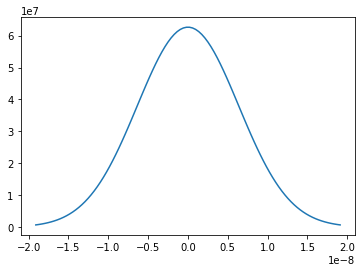

8.455378104455125e-09


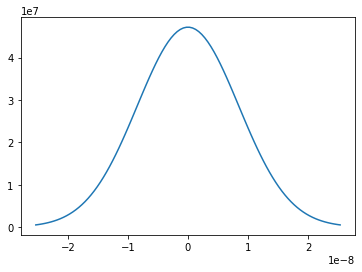

1.1227936324252725e-08


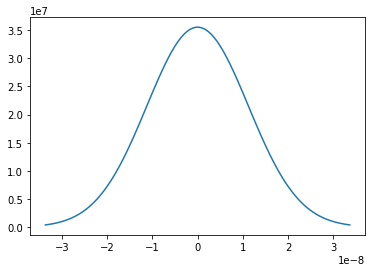

1.4909630520380306e-08


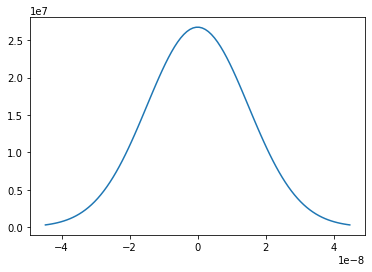

1.9798570691390378e-08


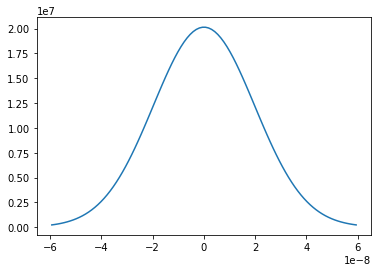

2.629061751685565e-08


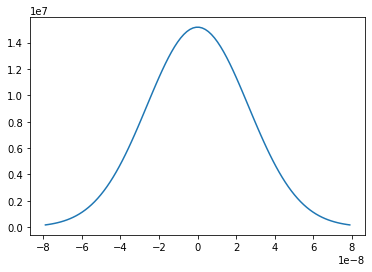

3.4911436814443276e-08


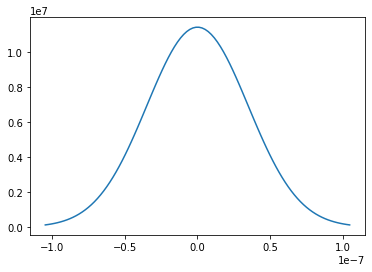

4.6359063940008057e-08


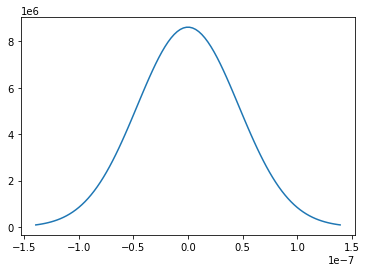

6.156042359816335e-08


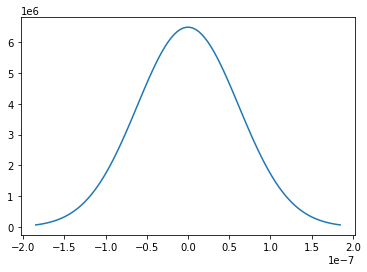

8.174638261192599e-08


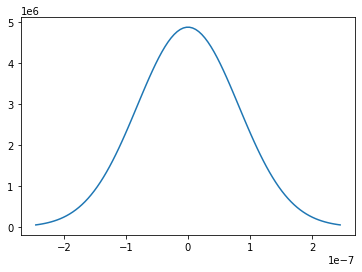

1.0855141423844259e-07


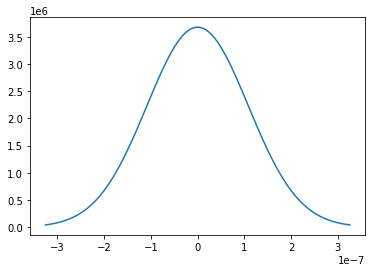

1.4414594380368448e-07


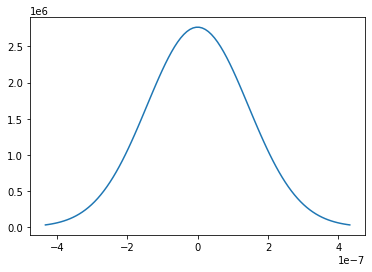

1.914120903900401e-07


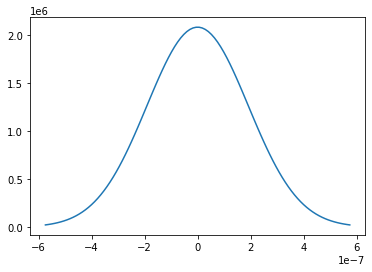

2.541770338603865e-07


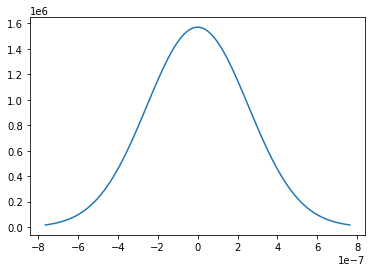

3.3752290401092166e-07


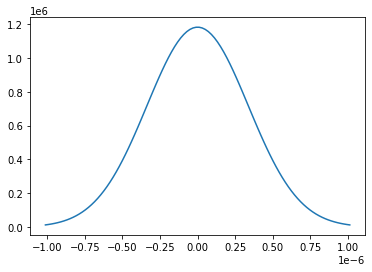

4.481982849120103e-07


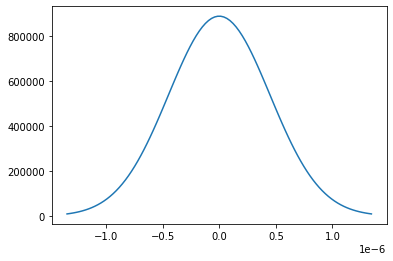

5.951646541165716e-07


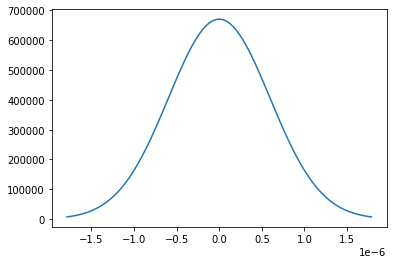

7.903220013260562e-07


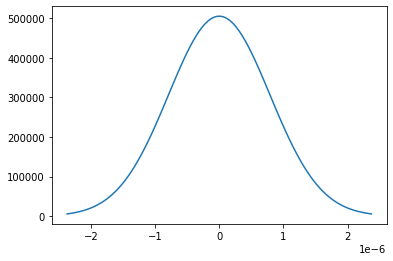

1.0494723800282314e-06


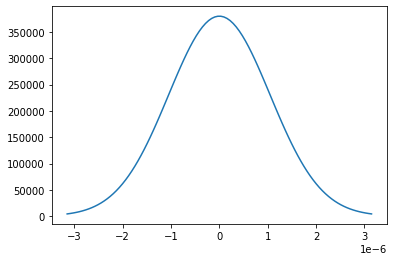

1.393599412371947e-06


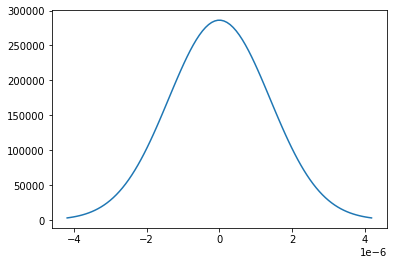

1.8505673506225608e-06


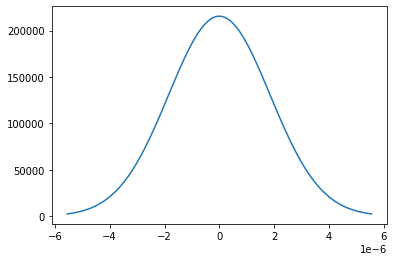

2.457377269440257e-06


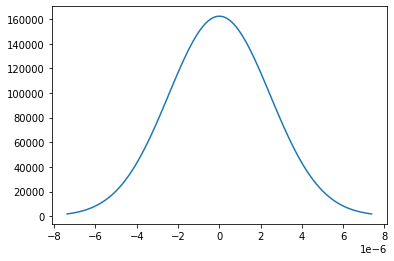

3.2631630739709574e-06


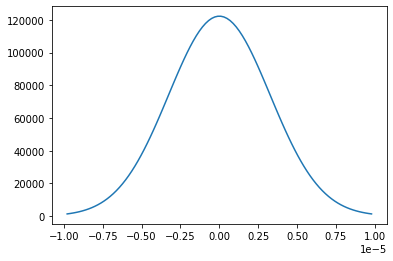

4.333169912746731e-06


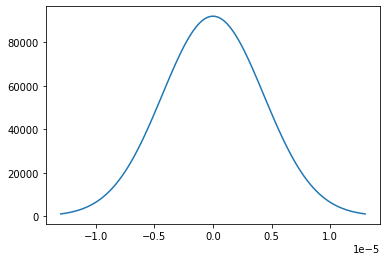

5.75403713134056e-06


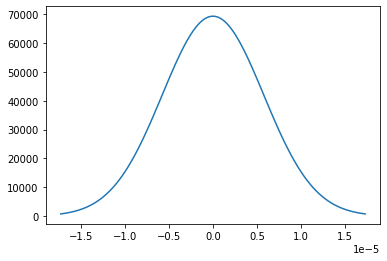

7.640813532480605e-06


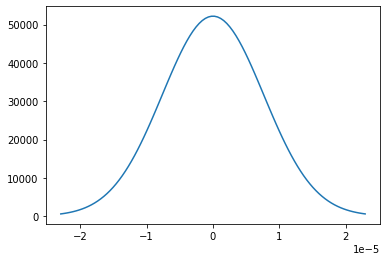

1.0146272973909406e-05


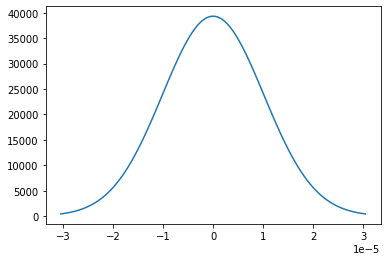

1.3473284595136033e-05


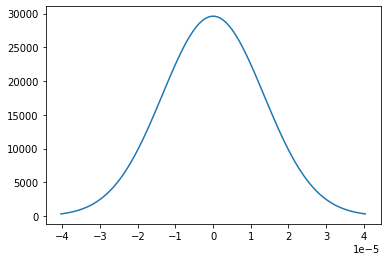

1.789123930048029e-05


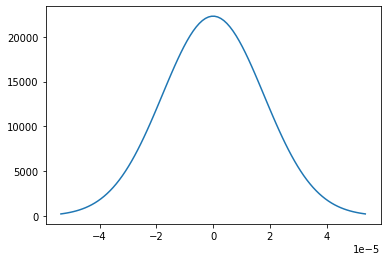

2.375786256486282e-05


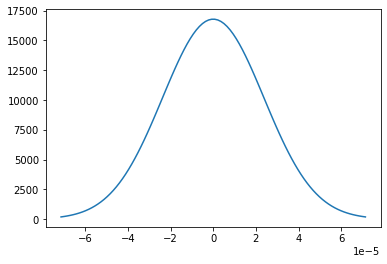

3.154817976373922e-05


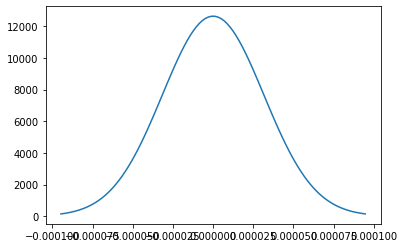

4.189297937399567e-05


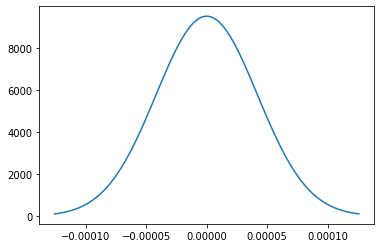

5.562988844281188e-05


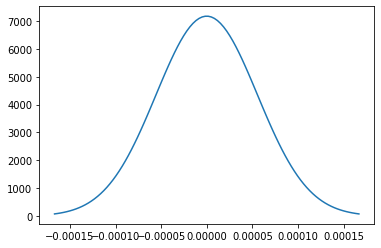

7.387119594763695e-05


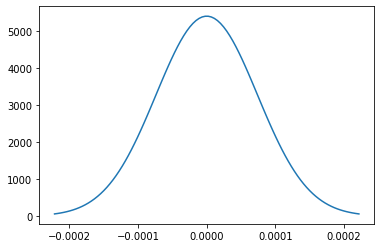

9.809391576159286e-05


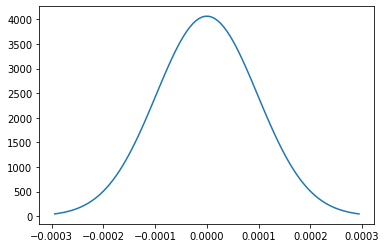

0.00013025938169794544


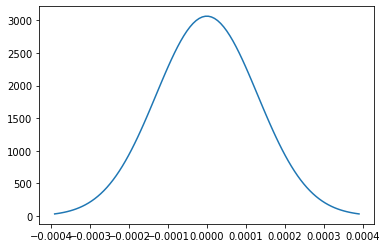

0.00017297205834399852


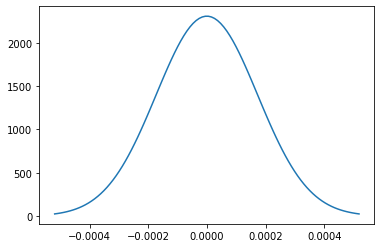

0.00022969042672963742


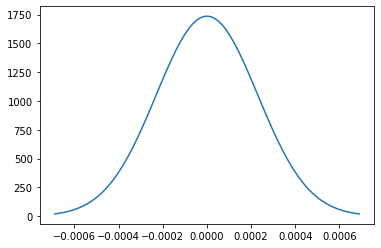

0.00030500702041883496


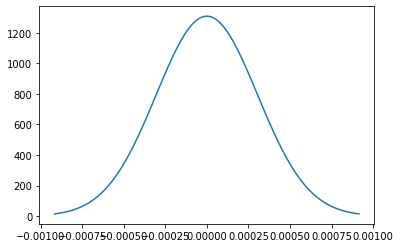

0.00040502028678006033


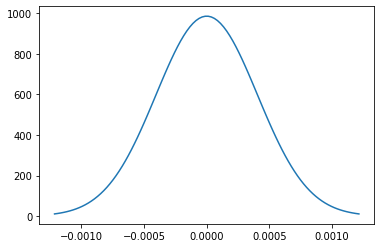

0.0005378283833528467


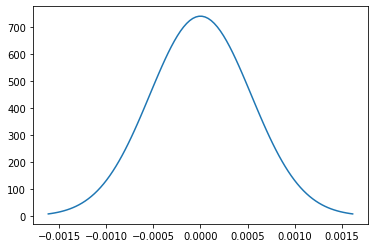

0.0007141848924136947


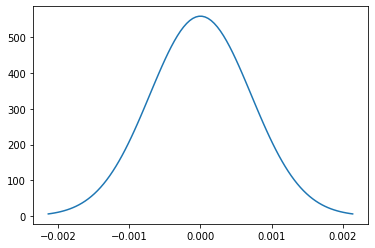

0.0009483695474960712


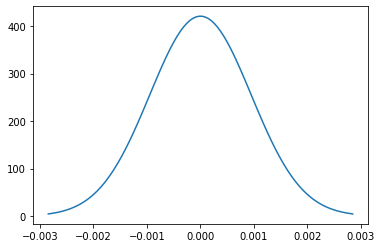

0.0012593444753164196


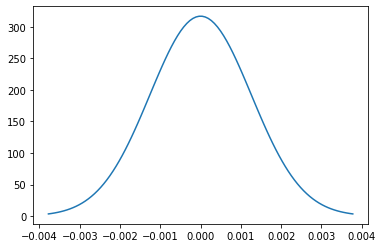

0.0016722895749787642


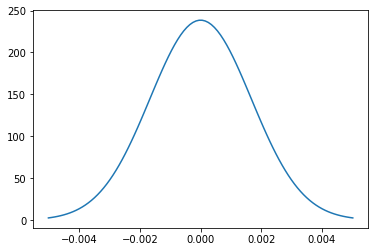

0.002220641355391875


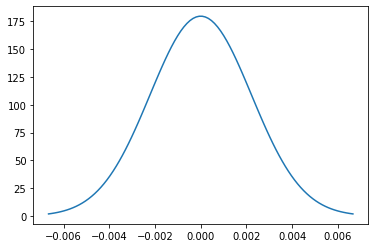

0.0029488003172634994


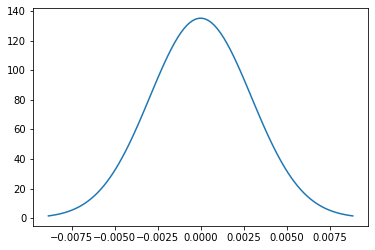

0.003915726098647961


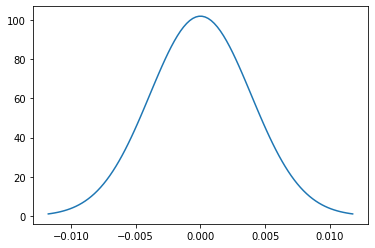

0.005199711485977602


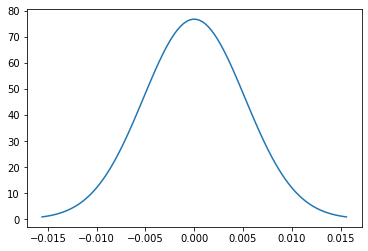

0.006904721846386195


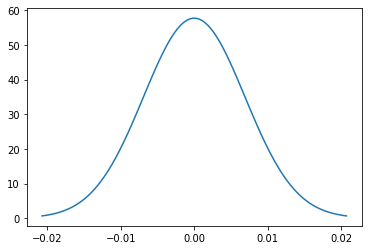

0.0091688132900392


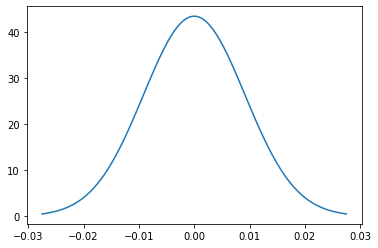

0.012175311188291191


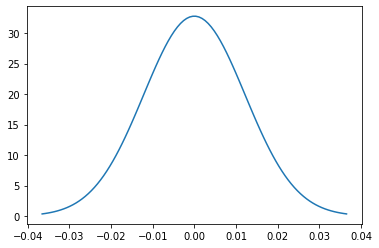

0.01616765418183091


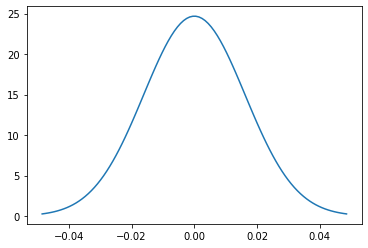

0.021469105610489432


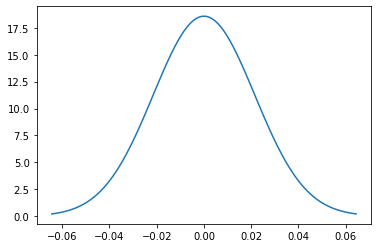

0.028508928415384518


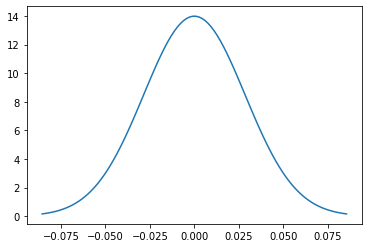

0.03785714291696427


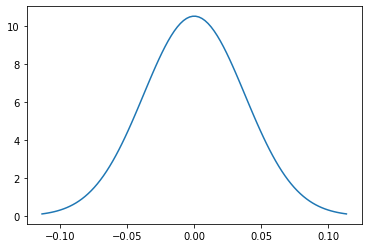

0.05027068183535634


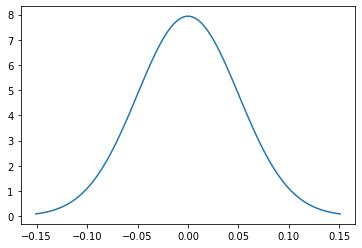

0.06675467976365763


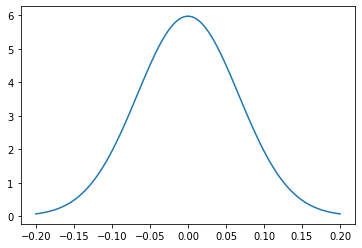

0.08864385975385738


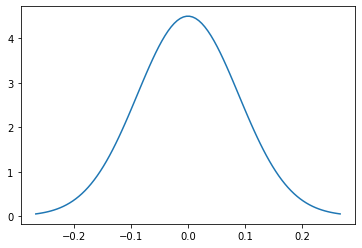

0.1177106069549143


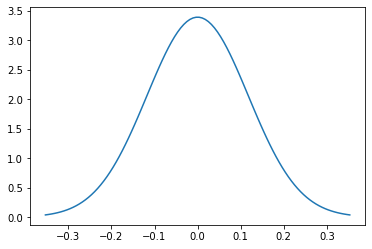

0.15630848011551465


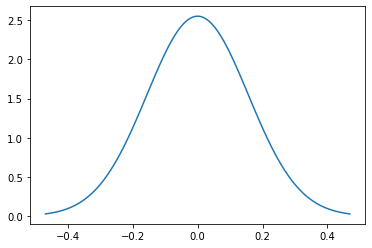

0.20756278119758773


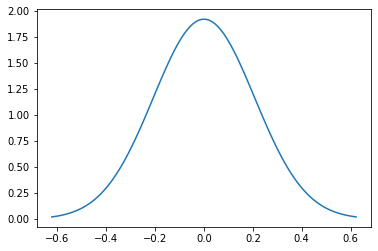

0.2756236136811765


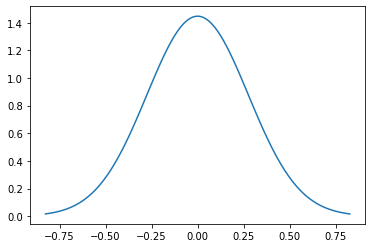

0.3660019199024392


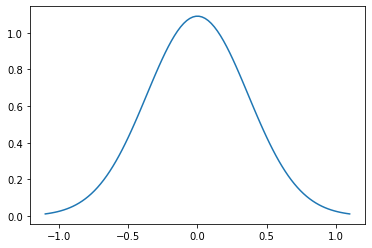

0.4860157066480383


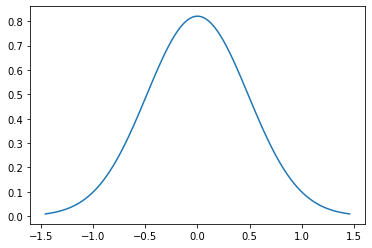

0.6453825902641191


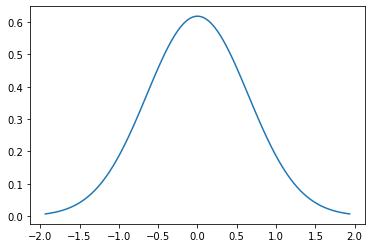

0.8570066401512101


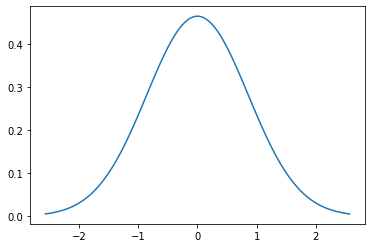

1.1380232320187076


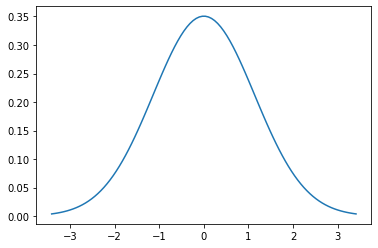

1.5111865135373015


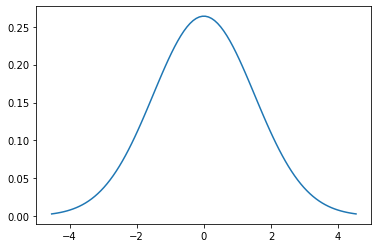

2.0067118266390906


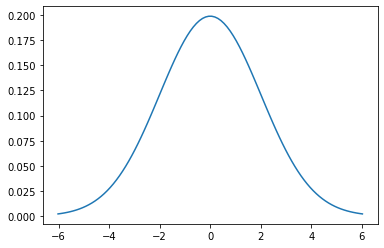

2.6647222689331973


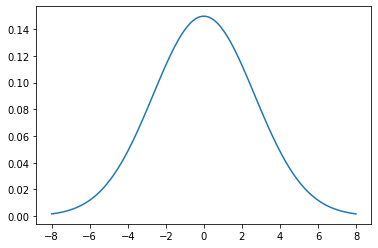

3.538497494351654


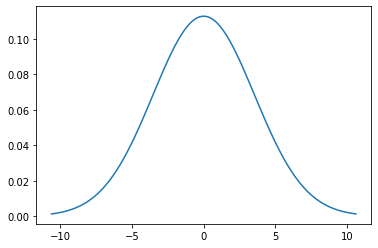

4.698787811116482


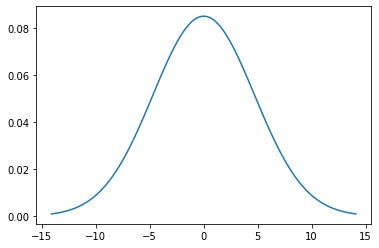

6.239542893126865


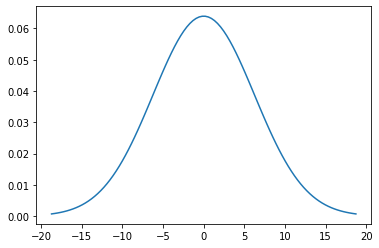

8.28551896328245


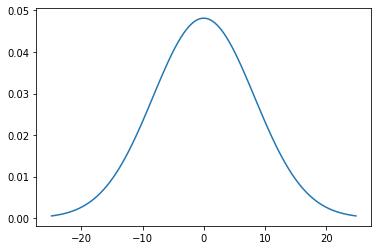

11.002380408681738


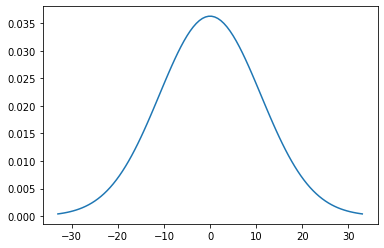

14.61011376382308


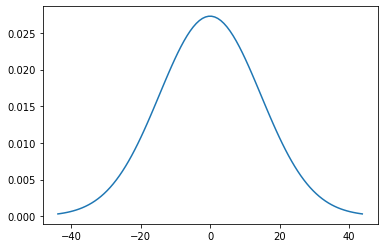

19.40084020307267


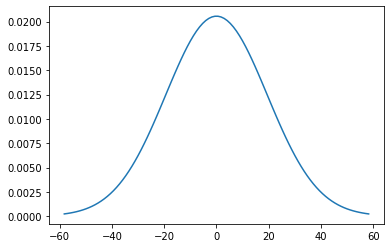

25.76246883448625


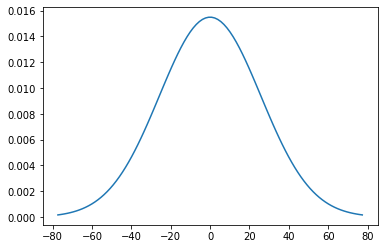

34.210106021371914


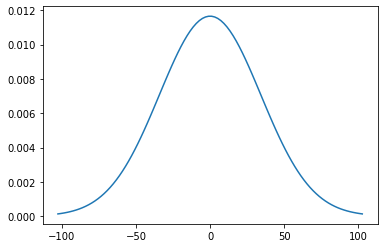

45.427763969516484


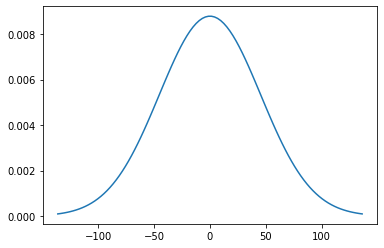

60.323745757143286


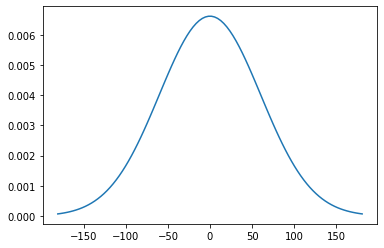

80.10419137577146


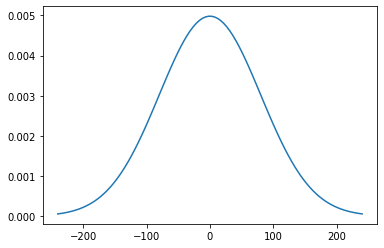

106.37073985864514


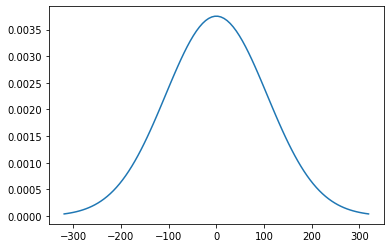

141.25021526604576


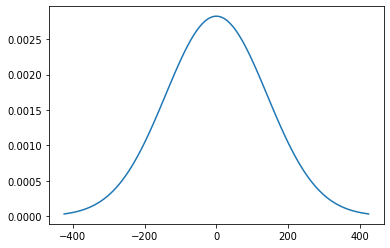

187.5668372813039


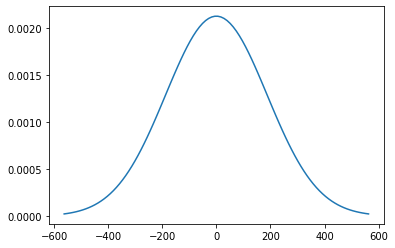

249.0709003977056


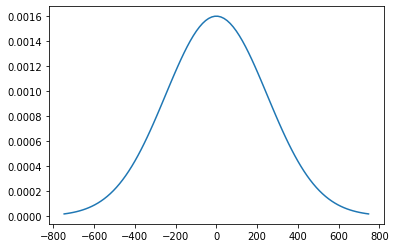

330.74243793311757


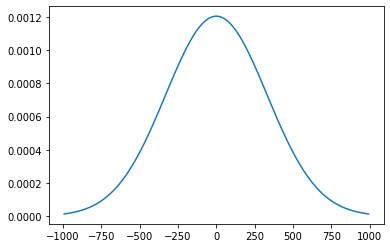

439.19445859180314


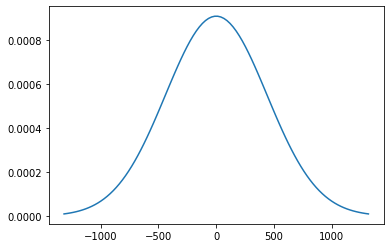

583.2084055680159


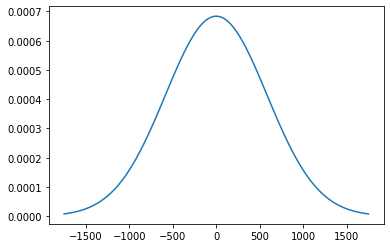

774.4451939724744


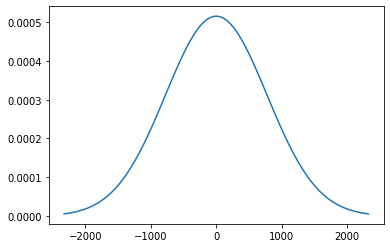

1028.389398342232


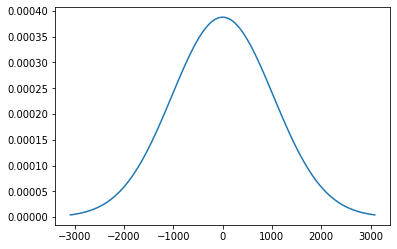

1365.6030389055597


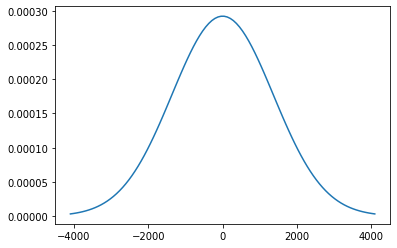

1813.3904809343524


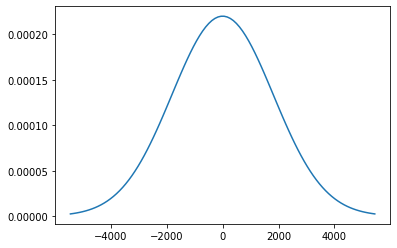

2408.009244228696


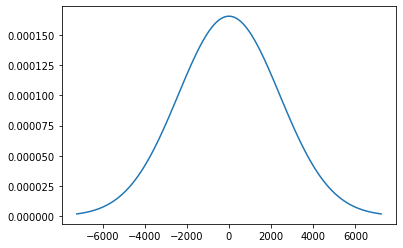

3197.605711973586


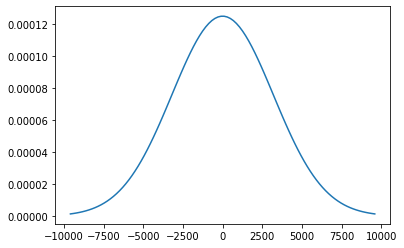

4246.1134033105955


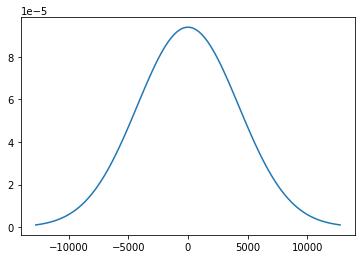

5638.429373519546


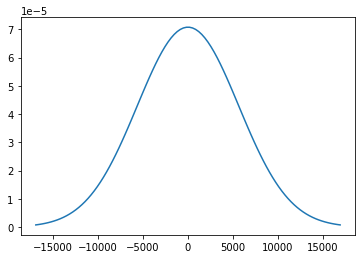

7487.287718973241


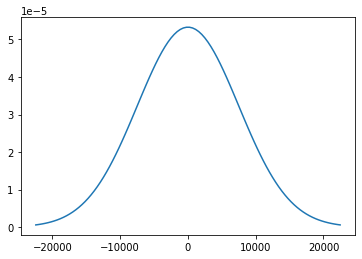

9942.386428859616


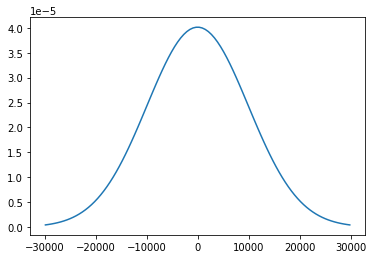

13202.505987313549


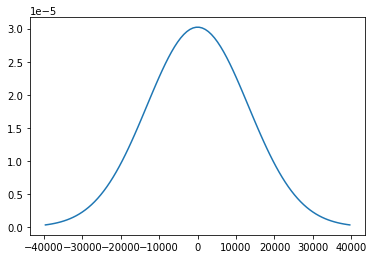

17531.599803367935


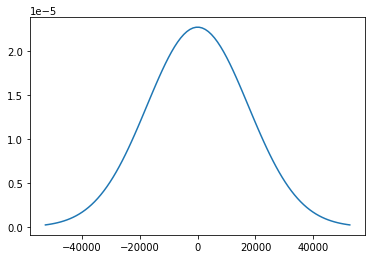

23280.157039224207


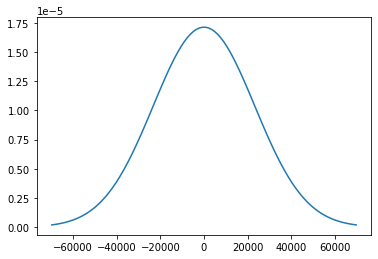

30913.563162405328


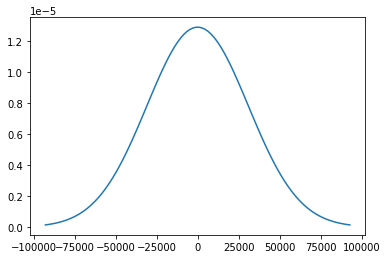

41049.74596988067


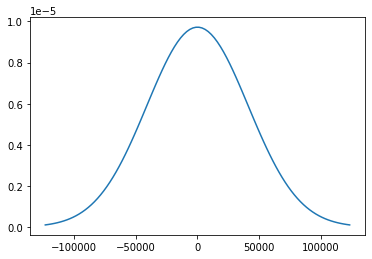

54509.13854251378


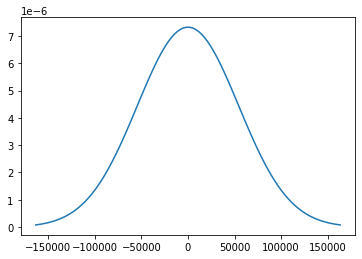

72380.9720722411


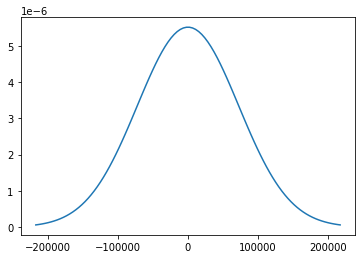

96111.20297174477


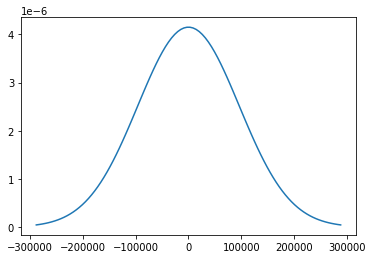

127619.07056250681


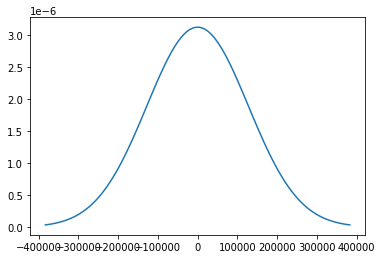

169451.48339649115


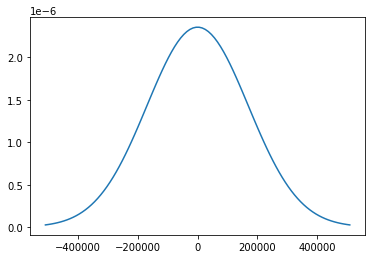

224987.26846291777


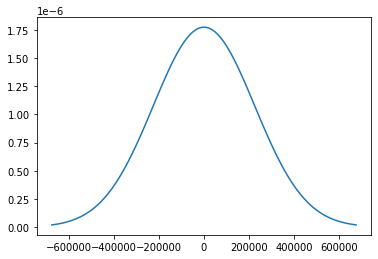

298706.91285627446


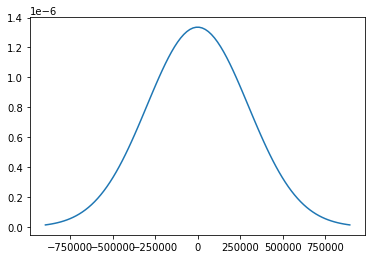

396547.86743808223


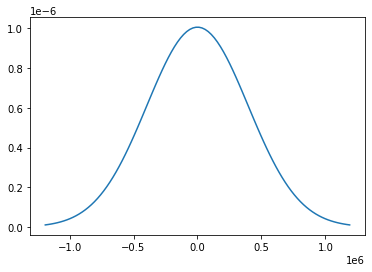

526370.7218011303


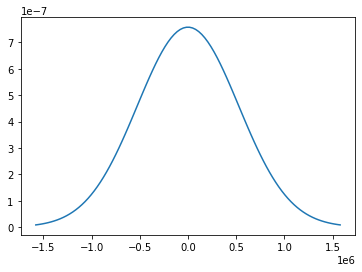

698567.2242913947


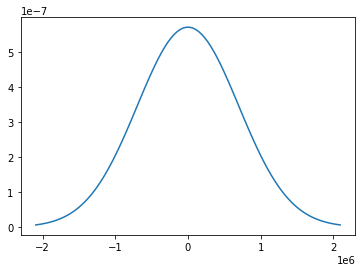

926846.0753973109


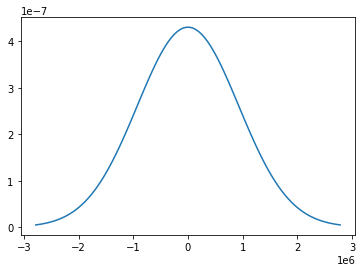

1229233.8567016623


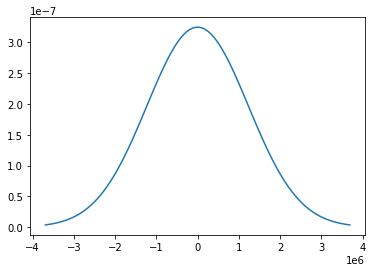

1629319.9034972666


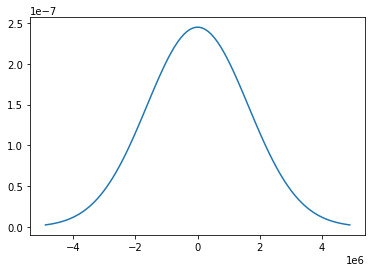

2157740.8772597574


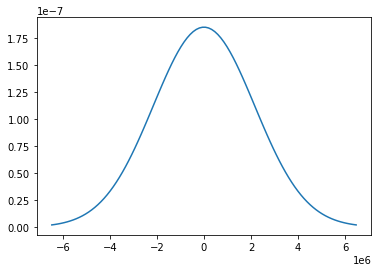

2853810.5770584787


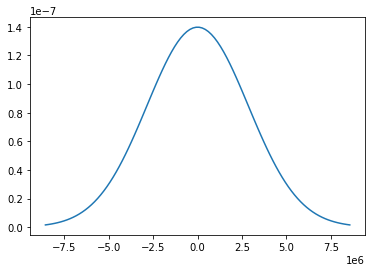

3766977.5904161665


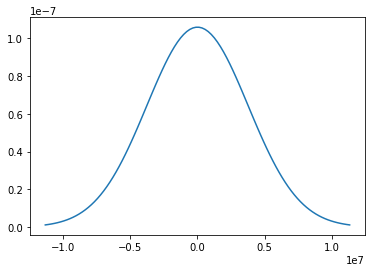

4588222.33983067


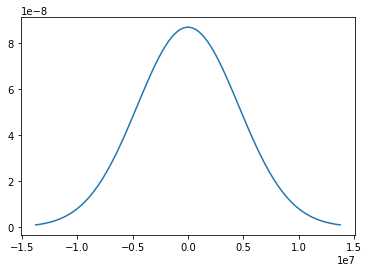

5576577.185645573


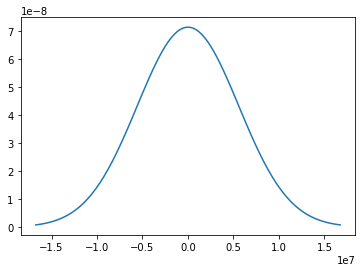

6757508.18257492


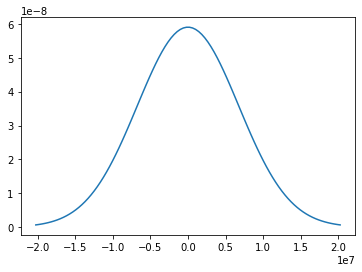

8153160.43132871


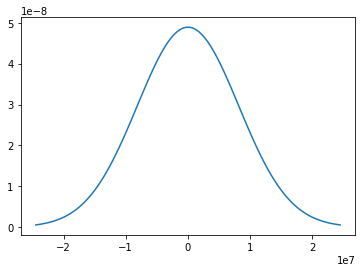

9262533.975355366


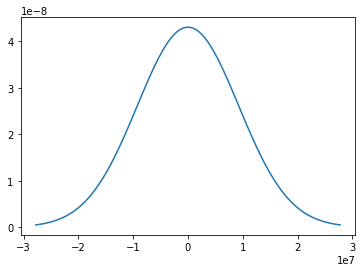

10478111.348514356


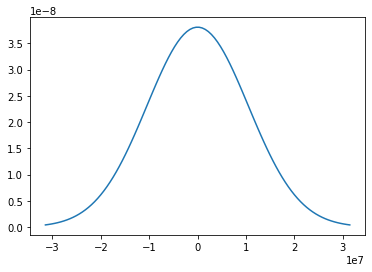

11782146.358726736


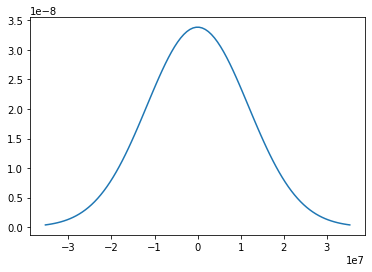

12741368.551682914


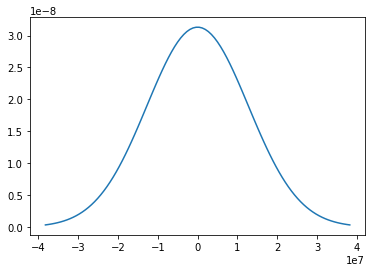

13693934.74994703


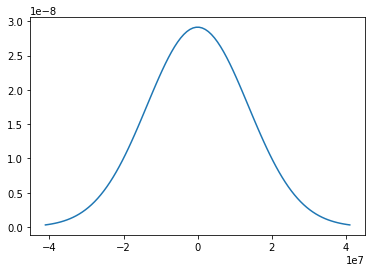

14586410.763730533


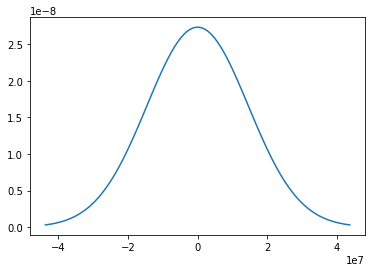

15102138.181086019


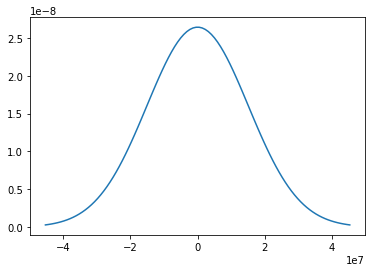

15499755.519068172


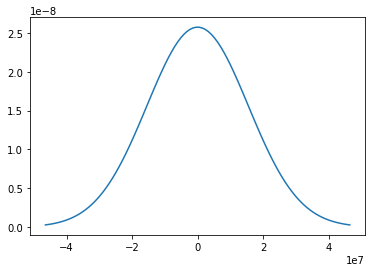

15668996.999577748


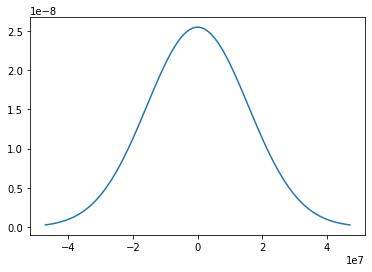

15677967.249681398


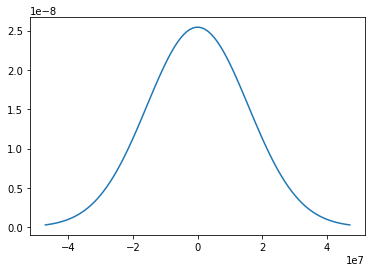

15538450.006271094


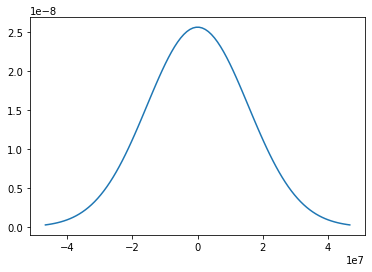

15214787.057870088


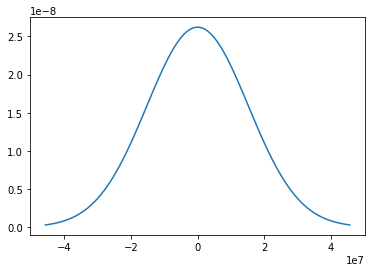

14830443.268821323


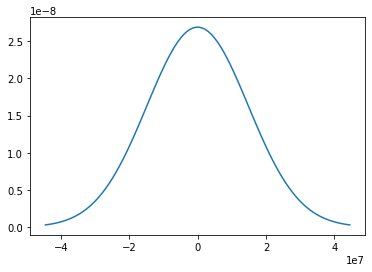

14245103.834547494


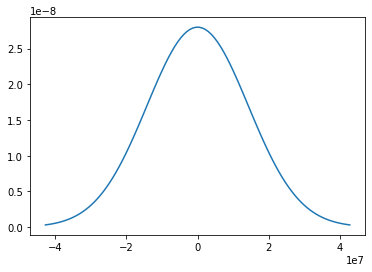

13687466.683543567


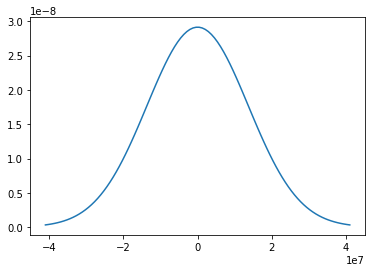

12916338.366055734


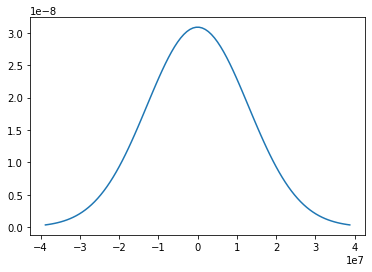

12252599.848755965


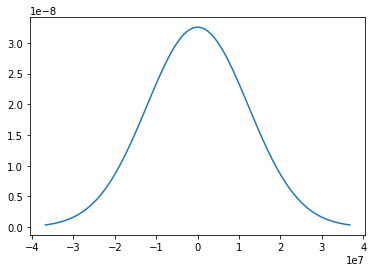

11361712.074048117


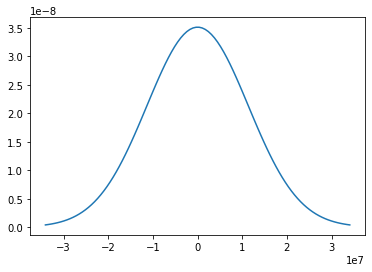

10646866.191580271


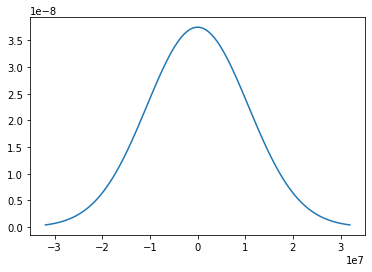

9977688.529381024


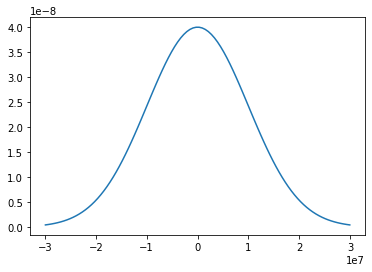

9095355.473121867


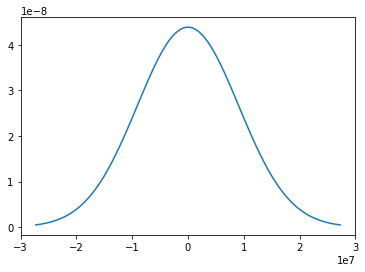

8398428.569506425


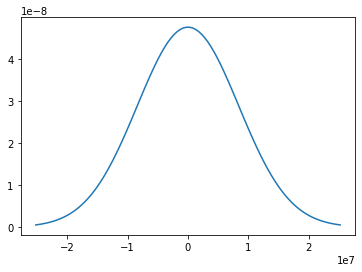

7756721.455600419


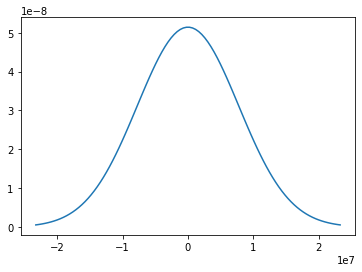

7145191.771754353


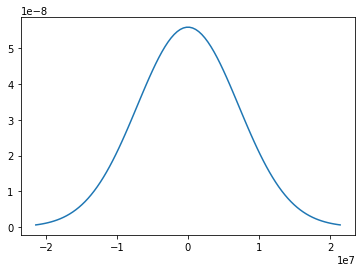

6556737.509932555


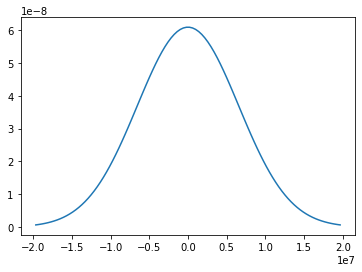

5986777.926359398


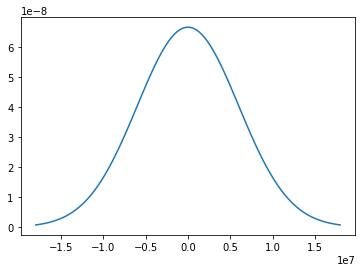

5435101.620445175


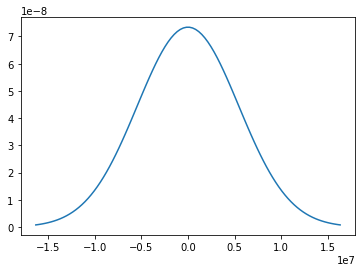

4902762.888957746


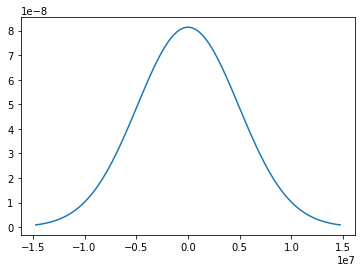

4390627.4760458805


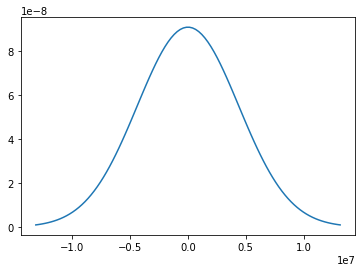

3899564.143997362


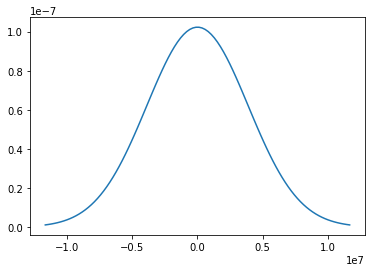

3430705.2587464144


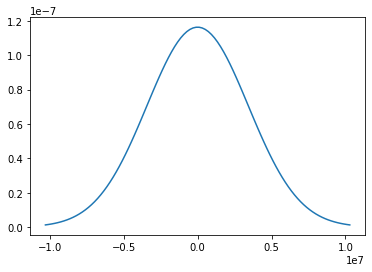

2985911.26851159


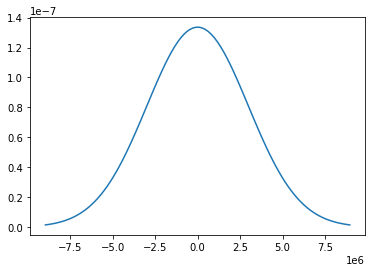

2568702.5557304756


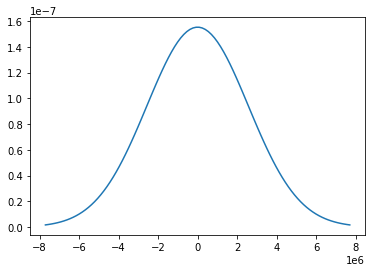

2185982.761422149


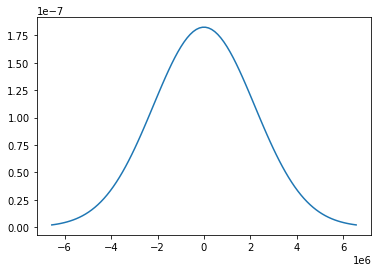

1849471.430309022


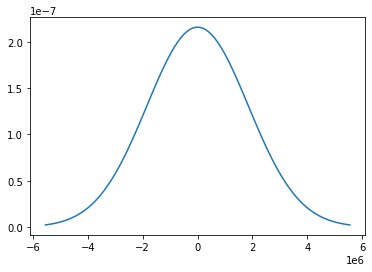

1561732.6526489407


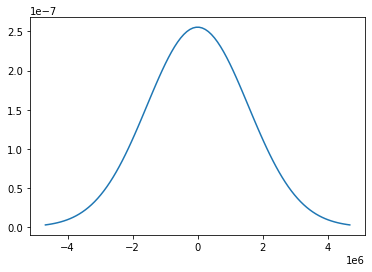

1310348.121991404


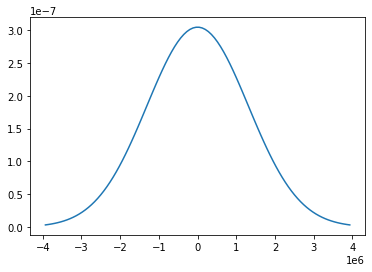

1089466.4148623403


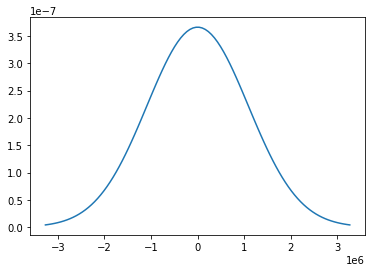

789084.1569612408


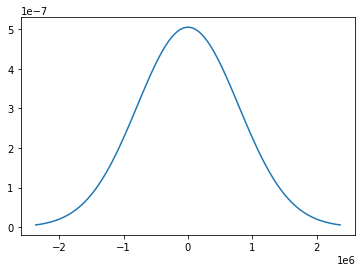

In [30]:
import scipy.stats as stats
variance_list = np.sqrt (Abs_phi2_a)
for variance in variance_list:
    mu = 0
    sigma = np.sqrt(variance)
    print(sigma)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma))
    plt.show()